In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

#### Loading the Dataset.

In [2]:
DF = pd.read_csv('UsedCarsscrape.csv')

In [3]:
DF.head(50)

,Unnamed: 0,Brand Name,Model Name,Year,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price
0,0,Maruti Suzuki Swift,Maruti Suzuki Swift VXi 2008,2008,Hatchback,99500,Petrol,Second Owner,munger,Manual,5,20.4,180000
1,1,Mahindra Marazzo,Mahindra Marazzo M8 8 STR 2019,2019,MUV,33000,Diesel,First Owner,kanchipuram,Manual,8,17.6,1335000
2,2,Honda City,Honda City 1.5 S MT 2012,2012,Sedan,77000,Petrol,First Owner,delhi,Manual,5,17.8,350000
3,3,Skoda Rapid,Skoda Rapid Ambition 1.6 TDI CR MT Plus Alloy ...,2013,Sedan,58000,Diesel,First Owner,bangalore,Manual,5,20.5,480000
4,4,Toyota Etios Liva,Toyota Etios Liva G 2014,2014,5 Seater,26700,Hatchback,MH 02,First Owner,17.71 kmpl,Manual,-,365000
5,5,Nissan Terrano,Nissan Terrano XL (P) 2018,2018,SUV,68000,Petrol,First Owner,ahmedabad,Manual,5,13.24,654050
6,6,Toyota Innova,Toyota Innova 2.5 GX 7 STR BS IV 2015,2015,MUV,92000,Diesel,First Owner,delhi,Manual,5,-,850000
7,7,Volkswagen Passat,Volkswagen Passat Highline DSG 2008,2008,Sedan,97000,Diesel,Third Owner,bangalore,Automatic,5,18.78,415000
8,8,Mahindra Scorpio,Mahindra Scorpio S4 Plus 2016,2016,SUV,54000,Diesel,First Owner,delhi,Manual,7,15.4,810000
9,9,Toyota Corolla Altis,Toyota Corolla Altis D-4D J 2011,2011,Sedan,72201,Diesel,First Owner,mumbai,Manual,5,18.4,380000


In [4]:
DF.shape

(7564, 13)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               7564 non-null   int64 
 1   Brand Name               7564 non-null   object
 2   Model Name               7564 non-null   object
 3   Year                     7564 non-null   object
 4   Type                     7564 non-null   object
 5   Total Kilometers Driven  7564 non-null   object
 6   Fuel Type                7564 non-null   object
 7   Owner                    7564 non-null   object
 8   Location                 7564 non-null   object
 9   Transmission             7564 non-null   object
 10  Seating Capacity         7564 non-null   object
 11  Mileage                  7564 non-null   object
 12  Price                    7564 non-null   object
dtypes: int64(1), object(12)
memory usage: 768.3+ KB


### Dataframe Description:

### Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model.

### FEATURES:
    
Brand Name: Name of the Car Brand

Model Name: Name of the specific Car Model of a Brand

Year:  Year of Manufacture

Type:  Car Model Type

Total Kilometers Driven: Total Kilometers,for which the car has been so far driven.

Fuel Type:  Type of fuel used

Owner: The ordinal number of previous owner

Location: Availability Location of Car       

Transmission:  Power Transmission type of the car   

Seating Capacity: Total number of passengers that the car can accomodate 

Mileage: Mileage of the Car

### Target / Label Column:

Price: Selling Price of the Car

####  Data Cleaning

In [6]:
DF.nunique()

Unnamed: 0                 7564
Brand Name                  231
Model Name                 4030
Year                         25
Type                         14
Total Kilometers Driven    1602
Fuel Type                    12
Owner                        37
Location                    325
Transmission                 54
Seating Capacity             22
Mileage                     353
Price                      1928
dtype: int64

In [7]:
DF['Type'].value_counts()

Hatchback    2683
Sedan        2181
SUV          1857
MUV           594
Crossover      87
Van            76
5 Seater       63
7 Seater        8
-               6
6 Seater        3
Pick Up         3
Wagon           1
Road            1
8 Seater        1
Name: Type, dtype: int64

In [8]:
DF = DF.drop(DF[DF.Type == '5 Seater'].index)

In [9]:
DF = DF.drop(DF[DF.Type == '7 Seater'].index)

In [10]:
DF = DF.drop(DF[DF.Type == '6 Seater'].index)

In [11]:
DF = DF.drop(DF[DF.Type == '8 Seater'].index)

In [12]:
DF = DF.drop(DF[DF.Type == '-'].index)

In [13]:
DF['Type'].value_counts()

Hatchback    2683
Sedan        2181
SUV          1857
MUV           594
Crossover      87
Van            76
Pick Up         3
Wagon           1
Road            1
Name: Type, dtype: int64

In [14]:
DF['Year'].value_counts()

2017       701
2012       690
2016       676
2018       664
2014       656
2015       651
2013       631
2011       497
2019       490
2010       421
2020       356
2009       303
2008       227
2007       196
2021       164
2006        95
2005        23
2004        17
2003        10
2002         5
2000         4
IV-2011      3
1999         2
1997         1
Name: Year, dtype: int64

In [15]:
DF['Year'] = DF['Year'].replace({'IV-2011':'2011'})

In [16]:
DF['Year'].value_counts()

2017    701
2012    690
2016    676
2018    664
2014    656
2015    651
2013    631
2011    500
2019    490
2010    421
2020    356
2009    303
2008    227
2007    196
2021    164
2006     95
2005     23
2004     17
2003     10
2002      5
2000      4
1999      2
1997      1
Name: Year, dtype: int64

In [17]:
DF['Brand Name'].value_counts()

Maruti Suzuki Swift               319
Honda City                        298
Maruti Suzuki Swift Dzire         248
Hyundai Verna                     243
Maruti Suzuki Wagon R             228
                                 ... 
Mahindra Alturas G4                 1
Maruti Suzuki Gypsy                 1
Renault Koleos                      1
Tata Movus                          1
Maruti Suzuki Wagon R Stingray      1
Name: Brand Name, Length: 227, dtype: int64

In [18]:
DF['Model Name'].value_counts()

Honda City ZX GXi 2007                 21
Maruti Suzuki Swift VDi 2012           20
Mahindra TUV300 T8 2016                19
Maruti Suzuki ALTO 800 LXi 2014        17
Mahindra XUV500 W8 2013                17
                                       ..
Renault KWID CLIMBER 1.0 AMT 2017       1
Tata Nexon XZA Plus Petrol 2019         1
Kia Seltos HTX CVT 1.5 Petrol 2019      1
Chevrolet Sail 1.3 TCDi LS ABS 2015     1
Toyota Innova 2.0 G 2006                1
Name: Model Name, Length: 3999, dtype: int64

In [19]:
DF['Total Kilometers Driven'].value_counts()

65000     173
55000     134
75000     131
60000     129
70000     123
         ... 
15874       1
6062        1
139000      1
82060       1
68860       1
Name: Total Kilometers Driven, Length: 1599, dtype: int64

In [20]:
DF['Fuel Type'].value_counts()

Diesel          3778
Petrol          3574
Petrol + CNG     113
Petrol + LPG      11
Hybrid             7
Name: Fuel Type, dtype: int64

In [21]:
DF['Owner'].value_counts()

First Owner     5816
Second Owner    1343
Third Owner      270
Fourth Owner      49
Fifth Owner        4
Sixth Owner        1
Name: Owner, dtype: int64

In [22]:
DF['Location'].value_counts()

delhi        1610
mumbai        528
bangalore     521
Delhi         491
Bangalore     324
             ... 
Baraut          1
Ambah           1
Amritsar        1
Jalgaon         1
palanpur        1
Name: Location, Length: 321, dtype: int64

In [23]:
DF['Location'] = DF['Location'].replace({'delhi':'Delhi','bangalore':'Bangalore','bengaluru':'Bangalore','Bengaluru':'Bangalore','patna':'Patna','mumbai':'Mumbai','navi mumbai':'Navi Mumbai','visakhapatnam':'Visakhapatnam','ahmedabad':'Ahmedabad','coimbatore':'Coimbatore','chennai':'Chennai','kolkata':'Kolkata','jaipur':'Jaipur','surat':'Surat','pune':'Pune','hyderabad':'Hyderabad','nagpur':'Nagpur','nashik':'Nashik','gurgaon':'Gurgaon','ghaziabad':'Ghaziabad','faridabad':'Faridabad','lucknow':'Lucknow','jodhpur':'Jodhpur','kanpur':'Kanpur','agra':'Agra','ludhiana':'Ludhiana','sirsa':'Sirsa','noida':'Noida','bhopal':'Bhopal','vadodara':'Vadodara','meerut':'Meerut','thane':'Thane','chandigarh':'Chandigarh','ranchi':'Ranchi','jamshedpur':'Jamshedpur','dehradun':'Dehradun','jalandhar':'Jalandhar','rajkot':'Rajkot','kolhapur':'Kolhapur','aurangabad':'Aurangabad','guwahati':'Guwahati','sangrur':'Sangrur','bathinda':'Bathinda','siliguri':'Siliguri','jabalpur':'Jabalpur','moradabad':'Moradabad','madurai':'Madurai','faizabad':'Faizabad','indore':'Indore','karim nagar':'Karim Nagar','hissar':'Hissar','kota':'Kota','kalyan':'Kalyan','dirba':'Dirba','ahmednagar':'Ahmednagar','panchkula':'Panchkula','mohali':'Mohali','unnao':'Unnao','kathua':'Kathua','raipur':'Raipur','thrissur':'Thrissur','godhara':'Godhara','baraut':'Baraut','ujjain':'Ujjain','amritsar':'Amritsar','shahjahanpur':'Shahjahanpur','srinagar':'Srinagar','patiala':'Patiala','pratapgarh':'Pratapgarh','hoshiarpur':'Hoshiarpur','akola':'Akola','jamnagar':'Jamnagar','jajpur':'Jajpur','palanpur':'Palanpur','solan':'Solan','bhubaneshwar':'Bhubaneshwar','karnal':'Karnal','kanpur nagar':'Kanpur Nagar','jhansi':'Jhansi','mandi':'Mandi','rudrapur':'Rudrapur'})

In [24]:
DF['Location'].value_counts()

Delhi                 2101
Bangalore              850
Mumbai                 561
Kolkata                385
Jaipur                 360
                      ... 
Nellore                  1
dharwad                  1
Thiruvananthapuram       1
24 pargana               1
sirohi                   1
Name: Location, Length: 240, dtype: int64

In [25]:
DF['Transmission'].value_counts()

Manual                           6382
Automatic                         920
Automated Manual Transmission     128
-                                  53
Name: Transmission, dtype: int64

In [26]:
DF['Seating Capacity'].value_counts()

5     6536
7      791
8       66
6       40
4       30
-       13
9        5
12       1
55       1
Name: Seating Capacity, dtype: int64

In [27]:
DF['Mileage'].value_counts()

-        1148
20        206
20.5      175
26.59     151
17.8      141
         ... 
11.64       1
28.45       1
20.0        1
19.97       1
19.2        1
Name: Mileage, Length: 353, dtype: int64

In [28]:
DF['Mileage'] = DF['Mileage'].replace({'16.10kpl':'16.10','7.6km/l':'7.6'})

In [29]:
DF['Mileage'].value_counts()

-        1148
20        206
20.5      175
26.59     151
17.8      141
         ... 
18.97       1
11.64       1
28.45       1
20.0        1
19.2        1
Name: Mileage, Length: 352, dtype: int64

In [30]:
DF['Price'].value_counts()

450000     87
400000     74
425000     70
350000     68
250000     66
           ..
897946      1
637300      1
66000       1
1081101     1
933000      1
Name: Price, Length: 1916, dtype: int64

#### checking for null values

In [31]:
DF.isnull().sum()

Unnamed: 0                 0
Brand Name                 0
Model Name                 0
Year                       0
Type                       0
Total Kilometers Driven    0
Fuel Type                  0
Owner                      0
Location                   0
Transmission               0
Seating Capacity           0
Mileage                    0
Price                      0
dtype: int64

In [32]:
DF.Location.nunique()

240

#### Checking for blank spaces, random characters in each column

In [33]:
search =["-"]

for c in DF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

- in Unnamed: 0 =  0
- in Brand Name =  0
- in Model Name =  0
- in Year =  0
- in Type =  0
- in Total Kilometers Driven =  0
- in Fuel Type =  0
- in Owner =  0
- in Location =  0
- in Transmission =  53
- in Seating Capacity =  13
- in Mileage =  1148
- in Price =  0


'-' in Transmission =  53, '-' in Seating Capacity =  13, and '-' in Mileage =  1148

In [34]:
DF.replace({'-': np.nan}, inplace=True) #converting '-' to NaN values

In [35]:
DF.isnull().sum()

Unnamed: 0                    0
Brand Name                    0
Model Name                    0
Year                          0
Type                          0
Total Kilometers Driven       0
Fuel Type                     0
Owner                         0
Location                      0
Transmission                 53
Seating Capacity             13
Mileage                    1148
Price                         0
dtype: int64

In [36]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7563
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               7483 non-null   int64 
 1   Brand Name               7483 non-null   object
 2   Model Name               7483 non-null   object
 3   Year                     7483 non-null   object
 4   Type                     7483 non-null   object
 5   Total Kilometers Driven  7483 non-null   object
 6   Fuel Type                7483 non-null   object
 7   Owner                    7483 non-null   object
 8   Location                 7483 non-null   object
 9   Transmission             7430 non-null   object
 10  Seating Capacity         7470 non-null   object
 11  Mileage                  6335 non-null   object
 12  Price                    7483 non-null   object
dtypes: int64(1), object(12)
memory usage: 818.5+ KB


Seating Capacity,Mileage,Price,Total Kilometers Driven,Year need to be converted to int64 / float

In [37]:
for c in DF[['Seating Capacity','Mileage','Price','Total Kilometers Driven','Year']]:
    DF[c] = DF[c].astype('float')

In [38]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7563
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7483 non-null   int64  
 1   Brand Name               7483 non-null   object 
 2   Model Name               7483 non-null   object 
 3   Year                     7483 non-null   float64
 4   Type                     7483 non-null   object 
 5   Total Kilometers Driven  7483 non-null   float64
 6   Fuel Type                7483 non-null   object 
 7   Owner                    7483 non-null   object 
 8   Location                 7483 non-null   object 
 9   Transmission             7430 non-null   object 
 10  Seating Capacity         7470 non-null   float64
 11  Mileage                  6335 non-null   float64
 12  Price                    7483 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 818.5+ KB


#### Handling Missing Values

In [39]:
DF.isnull().sum()

Unnamed: 0                    0
Brand Name                    0
Model Name                    0
Year                          0
Type                          0
Total Kilometers Driven       0
Fuel Type                     0
Owner                         0
Location                      0
Transmission                 53
Seating Capacity             13
Mileage                    1148
Price                         0
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer

In [41]:
DF.Transmission.value_counts()

Manual                           6382
Automatic                         920
Automated Manual Transmission     128
Name: Transmission, dtype: int64

#### Imputing most frequently occuring value to missing values.

In [42]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [43]:
si = si.fit(DF[['Transmission']])

In [44]:
DF[['Transmission']] = si.transform(DF[['Transmission']])

In [45]:
DF[['Transmission']].isnull().sum()

Transmission    0
dtype: int64

#### Using KNN Imputation technique for imputing missing data.

In [46]:
from sklearn.impute import KNNImputer

In [47]:
imp = KNNImputer(n_neighbors=2)

In [48]:
DF[['Seating Capacity']] = imp.fit_transform(DF[['Seating Capacity']])

In [49]:
DF[['Mileage']] = imp.fit_transform(DF[['Mileage']])

In [50]:
DF.isnull().sum()

Unnamed: 0                 0
Brand Name                 0
Model Name                 0
Year                       0
Type                       0
Total Kilometers Driven    0
Fuel Type                  0
Owner                      0
Location                   0
Transmission               0
Seating Capacity           0
Mileage                    0
Price                      0
dtype: int64

There are no more null values in Dataset

#### Feature Engineering

In [51]:
DF.reset_index(drop=True,inplace = True)

In [52]:
Brand_Name = DF['Brand Name'].tolist() #creating a list with values from colum 'Brand Name'

In [53]:
Brand_Name

['Maruti Suzuki Swift',
 'Mahindra Marazzo',
 'Honda City',
 'Skoda Rapid',
 'Nissan Terrano',
 'Toyota Innova',
 'Volkswagen Passat',
 'Mahindra Scorpio',
 'Toyota Corolla Altis',
 'Toyota Glanza',
 'Mahindra XUV500',
 'Maruti Suzuki Wagon R',
 'Mahindra Scorpio',
 'Renault KWID',
 'Hyundai Santa Fe',
 'Toyota Fortuner',
 'Volkswagen Jetta',
 'Toyota Innova Crysta',
 'Hyundai Verna',
 'Fiat Grande Punto',
 'Maruti Suzuki Baleno',
 'Mahindra TUV300',
 'Mahindra Scorpio',
 'Tata Safari Storme',
 'Mahindra XUV500',
 'Maruti Suzuki Celerio',
 'Volkswagen Vento',
 'Hyundai Verna',
 'Maruti Suzuki Swift Dzire',
 'Honda Jazz',
 'Hyundai Elite I20',
 'Mahindra TUV300',
 'Hyundai I10',
 'Mahindra XUV500',
 'Mahindra Scorpio',
 'Maruti Suzuki Swift',
 'Skoda SUPERB',
 'Maruti Suzuki Dzire',
 'Toyota Innova',
 'Hyundai I20',
 'Hyundai Verna',
 'Maruti Suzuki Wagon R',
 'Mahindra XUV500',
 'Maruti Suzuki Wagon R',
 'Honda City',
 'Maruti Suzuki Alto',
 'Hyundai I10',
 'Toyota Innova Crysta',
 'Vo

In [54]:
Brand = []
for b in Brand_Name:
    Brand.append(b.split(" ",1)[0])

In [55]:
Brand

['Maruti',
 'Mahindra',
 'Honda',
 'Skoda',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Mahindra',
 'Toyota',
 'Toyota',
 'Mahindra',
 'Maruti',
 'Mahindra',
 'Renault',
 'Hyundai',
 'Toyota',
 'Volkswagen',
 'Toyota',
 'Hyundai',
 'Fiat',
 'Maruti',
 'Mahindra',
 'Mahindra',
 'Tata',
 'Mahindra',
 'Maruti',
 'Volkswagen',
 'Hyundai',
 'Maruti',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Hyundai',
 'Mahindra',
 'Mahindra',
 'Maruti',
 'Skoda',
 'Maruti',
 'Toyota',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Honda',
 'Maruti',
 'Hyundai',
 'Toyota',
 'Volkswagen',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Honda',
 'Mahindra',
 'Honda',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Maruti',
 'Honda',
 'Hyundai',
 'Maruti',
 'Honda',
 'Volkswagen',
 'Toyota',
 'Honda',
 'Maruti',
 'Maruti',
 'Ford',
 'Honda',
 'Mahindra',
 'Chevrolet',
 'Skoda',
 'Toyota',
 'Maruti',
 'Hyundai',
 'Renault',
 'Ford',


In [56]:
Model = []
for b in Brand_Name:
    Model.append(b.split(" ",1)[1])

In [57]:
Model

['Suzuki Swift',
 'Marazzo',
 'City',
 'Rapid',
 'Terrano',
 'Innova',
 'Passat',
 'Scorpio',
 'Corolla Altis',
 'Glanza',
 'XUV500',
 'Suzuki Wagon R',
 'Scorpio',
 'KWID',
 'Santa Fe',
 'Fortuner',
 'Jetta',
 'Innova Crysta',
 'Verna',
 'Grande Punto',
 'Suzuki Baleno',
 'TUV300',
 'Scorpio',
 'Safari Storme',
 'XUV500',
 'Suzuki Celerio',
 'Vento',
 'Verna',
 'Suzuki Swift Dzire',
 'Jazz',
 'Elite I20',
 'TUV300',
 'I10',
 'XUV500',
 'Scorpio',
 'Suzuki Swift',
 'SUPERB',
 'Suzuki Dzire',
 'Innova',
 'I20',
 'Verna',
 'Suzuki Wagon R',
 'XUV500',
 'Suzuki Wagon R',
 'City',
 'Suzuki Alto',
 'I10',
 'Innova Crysta',
 'Jetta',
 'Suzuki Alto',
 'Polo',
 'Suzuki Ertiga',
 'Thar',
 'Suzuki Ritz',
 'City',
 'BOLERO CAMPER',
 'City',
 'Suzuki Dzire',
 'Bolero',
 'Suzuki Alto',
 'Verna',
 'Verna',
 'Suzuki Swift Dzire',
 'Elite I20',
 'Scorpio',
 'Suzuki Ertiga',
 'Suzuki Swift',
 'Accord',
 'Santa Fe',
 'Suzuki Baleno',
 'Amaze',
 'Jetta',
 'Innova Crysta',
 'City',
 'Suzuki Wagon R',
 'Su

In [58]:
Model_Name = DF['Model Name'].tolist() #creating a list with values from colum 'Model Name'

In [59]:
Model_Name

['Maruti Suzuki Swift VXi 2008',
 'Mahindra Marazzo M8 8 STR 2019',
 'Honda City 1.5 S MT 2012',
 'Skoda Rapid Ambition 1.6 TDI CR MT Plus Alloy 2013',
 'Nissan Terrano XL (P) 2018',
 'Toyota Innova 2.5 GX 7 STR BS IV 2015',
 'Volkswagen Passat Highline DSG 2008',
 'Mahindra Scorpio S4 Plus 2016',
 'Toyota Corolla Altis D-4D J 2011',
 'Toyota Glanza G 2019',
 'Mahindra XUV500 W8 2WD 2014',
 'Maruti Suzuki Wagon R VXi 2017',
 'Mahindra Scorpio S11 2WD 8 SEATER 2019',
 'Renault KWID RXL 2020',
 'Hyundai Santa Fe 2WD MT 2011',
 'Toyota Fortuner 2.8 4x2 MT 2018',
 'Volkswagen Jetta 2.0L TDI Highline 2011',
 'Toyota Innova Crysta 2.4 ZX 7 STR 2016',
 'Hyundai Verna FLUIDIC 1.6 CRDI SX 2013',
 'Fiat Grande Punto EMOTION PACK 1.4 2009',
 'Maruti Suzuki Baleno Zeta 1.2 AT BS6 2021',
 'Mahindra TUV300 T10 AMT 2018',
 'Mahindra Scorpio S4 2017',
 'Tata Safari Storme 2.2 VX 4x2 2014',
 'Mahindra XUV500 W8 2WD 2014',
 'Maruti Suzuki Celerio ZXi AMT 2017',
 'Volkswagen Vento 1.6L MT Trendline Diese

In [60]:
Variant1 = []
for m in Model_Name:
    Variant1.append(m.split(" ",2)[2])

In [61]:
Variant1

['Swift VXi 2008',
 'M8 8 STR 2019',
 '1.5 S MT 2012',
 'Ambition 1.6 TDI CR MT Plus Alloy 2013',
 'XL (P) 2018',
 '2.5 GX 7 STR BS IV 2015',
 'Highline DSG 2008',
 'S4 Plus 2016',
 'Altis D-4D J 2011',
 'G 2019',
 'W8 2WD 2014',
 'Wagon R VXi 2017',
 'S11 2WD 8 SEATER 2019',
 'RXL 2020',
 'Fe 2WD MT 2011',
 '2.8 4x2 MT 2018',
 '2.0L TDI Highline 2011',
 'Crysta 2.4 ZX 7 STR 2016',
 'FLUIDIC 1.6 CRDI SX 2013',
 'Punto EMOTION PACK 1.4 2009',
 'Baleno Zeta 1.2 AT BS6 2021',
 'T10 AMT 2018',
 'S4 2017',
 'Storme 2.2 VX 4x2 2014',
 'W8 2WD 2014',
 'Celerio ZXi AMT 2017',
 '1.6L MT Trendline Diesel 2011',
 '1.6 CRDI SX (O) AT 2014',
 'Swift DZire VXi 2011',
 'V AT 2017',
 'i20 Sportz 1.2 Opt 2015',
 'T8 2016',
 'Asta 1.2 AT 2012',
 'W6 2014',
 'S10 2017',
 'Swift VDi 2014',
 'ELEGANCE 2.0 TDI CR AT 2009',
 'Dzire LXi 2019',
 '2.0 VX 7 STR BS IV 2015',
 'Sportz AT 1.4 2013',
 '1.6 VTVT SX (O) AT 2018',
 'Wagon R LXi 2011',
 'W10 2017',
 'Wagon R LXi Minor 2007',
 'VX (O) BL i-VTEC 2015',
 '

In [62]:
Variant = []
for v in Variant1:
    Variant.append(v.rsplit(" ",1)[0]) #removing manufacture year from the variant names

In [63]:
Variant

['Swift VXi',
 'M8 8 STR',
 '1.5 S MT',
 'Ambition 1.6 TDI CR MT Plus Alloy',
 'XL (P)',
 '2.5 GX 7 STR BS IV',
 'Highline DSG',
 'S4 Plus',
 'Altis D-4D J',
 'G',
 'W8 2WD',
 'Wagon R VXi',
 'S11 2WD 8 SEATER',
 'RXL',
 'Fe 2WD MT',
 '2.8 4x2 MT',
 '2.0L TDI Highline',
 'Crysta 2.4 ZX 7 STR',
 'FLUIDIC 1.6 CRDI SX',
 'Punto EMOTION PACK 1.4',
 'Baleno Zeta 1.2 AT BS6',
 'T10 AMT',
 'S4',
 'Storme 2.2 VX 4x2',
 'W8 2WD',
 'Celerio ZXi AMT',
 '1.6L MT Trendline Diesel',
 '1.6 CRDI SX (O) AT',
 'Swift DZire VXi',
 'V AT',
 'i20 Sportz 1.2 Opt',
 'T8',
 'Asta 1.2 AT',
 'W6',
 'S10',
 'Swift VDi',
 'ELEGANCE 2.0 TDI CR AT',
 'Dzire LXi',
 '2.0 VX 7 STR BS IV',
 'Sportz AT 1.4',
 '1.6 VTVT SX (O) AT',
 'Wagon R LXi',
 'W10',
 'Wagon R LXi Minor',
 'VX (O) BL i-VTEC',
 'Alto LXi',
 'Magna 1.2',
 'Crysta 2.4 VX 7 STR',
 '2.0L TDI Comfortline',
 'Alto LX BS-IV',
 'GT TSI Sport',
 'Ertiga VDi',
 '4X4',
 'Ritz Vxi (ABS) BS-IV',
 'ZX i-VTEC',
 'Camper 2WD',
 'VX i-VTEC Opt',
 'Dzire ZXi',
 'SLX',

##### Adding 'Brand', 'Model' and 'Variant' columns to DF dataframe.

In [64]:
df2 = pd.DataFrame({'Brand':Brand, 'Model':Model,'Variant': Variant})

In [65]:
df2

,Brand,Model,Variant
0,Maruti,Suzuki Swift,Swift VXi
1,Mahindra,Marazzo,M8 8 STR
2,Honda,City,1.5 S MT
3,Skoda,Rapid,Ambition 1.6 TDI CR MT Plus Alloy
4,Nissan,Terrano,XL (P)
...,...,...,...
7478,Hyundai,Elite I20,i20 Sportz 1.2
7479,Toyota,Corolla Altis,Altis 1.8 G AT
7480,Toyota,Camry,Hybrid
7481,Hyundai,Eon,D-Lite +


In [66]:
df2.index = DF.index

In [67]:
DF[['Brand','Model','Variant']] = df2[['Brand','Model','Variant']]

In [68]:
DF

,Unnamed: 0,Brand Name,Model Name,Year,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant
0,0,Maruti Suzuki Swift,Maruti Suzuki Swift VXi 2008,2008.0,Hatchback,99500.0,Petrol,Second Owner,munger,Manual,5.0,20.40,180000.0,Maruti,Suzuki Swift,Swift VXi
1,1,Mahindra Marazzo,Mahindra Marazzo M8 8 STR 2019,2019.0,MUV,33000.0,Diesel,First Owner,kanchipuram,Manual,8.0,17.60,1335000.0,Mahindra,Marazzo,M8 8 STR
2,2,Honda City,Honda City 1.5 S MT 2012,2012.0,Sedan,77000.0,Petrol,First Owner,Delhi,Manual,5.0,17.80,350000.0,Honda,City,1.5 S MT
3,3,Skoda Rapid,Skoda Rapid Ambition 1.6 TDI CR MT Plus Alloy ...,2013.0,Sedan,58000.0,Diesel,First Owner,Bangalore,Manual,5.0,20.50,480000.0,Skoda,Rapid,Ambition 1.6 TDI CR MT Plus Alloy
4,5,Nissan Terrano,Nissan Terrano XL (P) 2018,2018.0,SUV,68000.0,Petrol,First Owner,Ahmedabad,Manual,5.0,13.24,654050.0,Nissan,Terrano,XL (P)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,7559,Hyundai Elite I20,Hyundai Elite i20 Sportz 1.2 2019,2019.0,Hatchback,13000.0,Petrol,First Owner,Delhi,Manual,5.0,18.60,715000.0,Hyundai,Elite I20,i20 Sportz 1.2
7479,7560,Toyota Corolla Altis,Toyota Corolla Altis 1.8 G AT 2017,2017.0,Sedan,33000.0,Petrol,First Owner,Ahmedabad,Automatic,5.0,15.23,1299997.0,Toyota,Corolla Altis,Altis 1.8 G AT
7480,7561,Toyota Camry,Toyota Camry Hybrid 2017,2017.0,Sedan,40000.0,Petrol,First Owner,Bangalore,Automatic,5.0,19.16,2867000.0,Toyota,Camry,Hybrid
7481,7562,Hyundai Eon,Hyundai Eon D-Lite + 2016,2016.0,Hatchback,16000.0,Petrol,First Owner,Kolkata,Manual,5.0,21.10,210000.0,Hyundai,Eon,D-Lite +


In [69]:
DF.Brand.value_counts()

Maruti           2008
Hyundai          1453
Honda             728
Mahindra          687
Toyota            671
Ford              390
Volkswagen        292
Renault           265
Tata              250
Skoda             214
Chevrolet         184
Nissan            117
Kia                71
MG                 48
Fiat               44
Datsun             38
Mitsubishi         18
Jeep                1
Opel                1
Isuzu               1
Mercedes-benz       1
Eicher              1
Name: Brand, dtype: int64

In [70]:
DF.Brand.nunique()

22

In [71]:
DF.Model.nunique()

227

In [72]:
DF.Model.value_counts()

Suzuki Swift               319
City                       298
Suzuki Swift Dzire         248
Verna                      243
Suzuki Wagon R             228
                          ... 
Palio Stile                  1
Tiguan                       1
Suzuki Wagon R Stingray      1
Marshal                      1
Gloster                      1
Name: Model, Length: 227, dtype: int64

In [73]:
DF.Variant.value_counts()

Swift VDi                              95
Swift DZire VDi                        80
Swift VXi                              75
Wagon R LXi                            63
Alto LXi                               57
                                       ..
2.0 VX 8 STR                            1
Baleno Zeta 1.2 AT BS6                  1
Omni MPI STD BSIV                       1
i10 Sportz 1.2 Kappa VTVT DUAL TONE     1
2WD AT GLS Diesel                       1
Name: Variant, Length: 1785, dtype: int64

In [74]:
DF.Variant.nunique()

1785

#### Dropping columns Unnamed: 0, Brand Name and Model Name since they are no longer required

In [75]:
DF.drop(columns = ['Unnamed: 0','Brand Name','Model Name'],inplace=True)

### Getting statistical information of the data.

In [76]:
DF.describe()

,Year,Total Kilometers Driven,Seating Capacity,Mileage,Price
count,7483.000000,7.483000e+03,7483.000000,7483.000000,7.483000e+03
mean,2014.219431,5.592403e+04,5.249933,19.136781,6.203389e+05
std,3.765793,5.002956e+04,0.894784,4.054555,5.318226e+05
min,1997.000000,8.900000e+01,4.000000,5.800000,3.500000e+04
25%,2012.000000,2.950000e+04,5.000000,17.030000,2.987500e+05
50%,2014.000000,5.500000e+04,5.000000,19.136781,4.850000e+05
75%,2017.000000,7.400000e+04,5.000000,21.140000,7.460000e+05
max,2021.000000,1.484000e+06,55.000000,33.440000,5.000000e+06


Big difference between max and 75% in Seating Capacity column indicates presence of outliers.

In [77]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the object type Columns

Type            object
Fuel Type       object
Owner           object
Location        object
Transmission    object
Brand           object
Model           object
Variant         object
dtype: object

In [78]:
DF.dtypes[DF.dtypes != 'object'] #Identifying the non object type Columns

Year                       float64
Total Kilometers Driven    float64
Seating Capacity           float64
Mileage                    float64
Price                      float64
dtype: object

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Column

<AxesSubplot:xlabel='Price', ylabel='Density'>

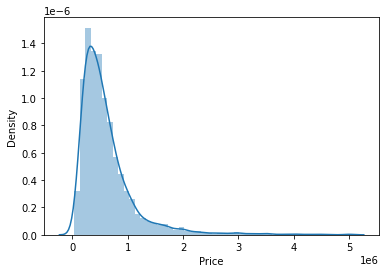

In [79]:
sns.distplot(DF.Price)

From the graph above it is observed that the Price data forms a continuous distribution and the distribution is skewed.

In [80]:
DF.Price.describe()

count    7.483000e+03
mean     6.203389e+05
std      5.318226e+05
min      3.500000e+04
25%      2.987500e+05
50%      4.850000e+05
75%      7.460000e+05
max      5.000000e+06
Name: Price, dtype: float64

In [81]:
DF.Price.skew()

3.1363932478993113

#### Analyzing the Feature Columns

In [82]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

Type            object
Fuel Type       object
Owner           object
Location        object
Transmission    object
Brand           object
Model           object
Variant         object
dtype: object

In [83]:
DF.Type.value_counts()

Hatchback    2683
Sedan        2181
SUV          1857
MUV           594
Crossover      87
Van            76
Pick Up         3
Wagon           1
Road            1
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

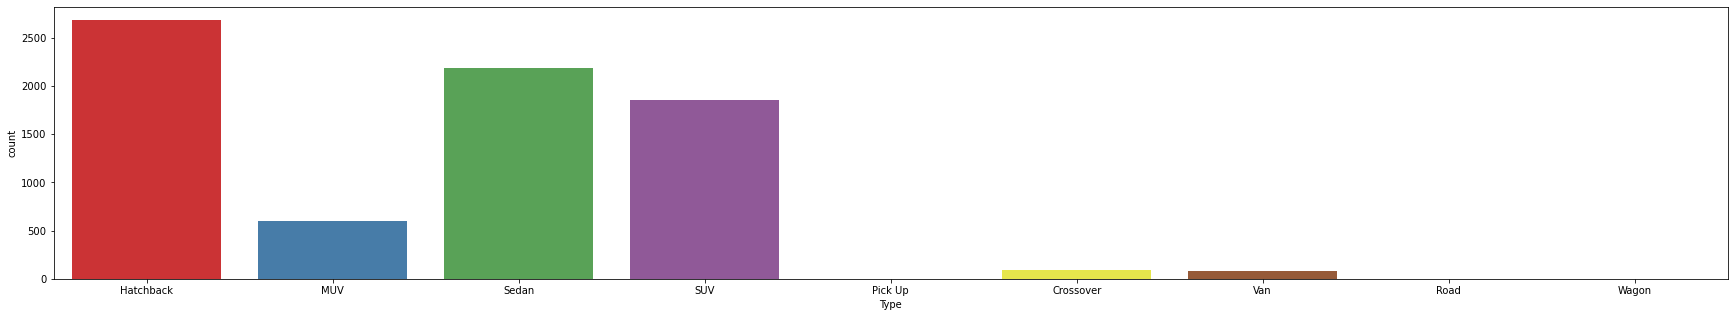

In [84]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF.Type, palette="Set1")

In [85]:
DF['Fuel Type'].value_counts()

Diesel          3778
Petrol          3574
Petrol + CNG     113
Petrol + LPG      11
Hybrid             7
Name: Fuel Type, dtype: int64

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

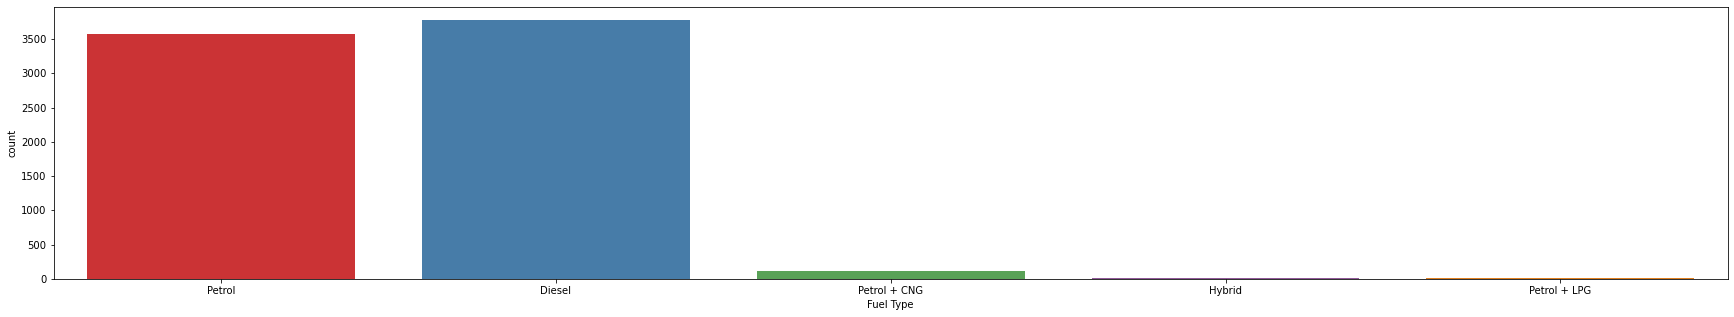

In [86]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Fuel Type'], palette="Set1")

In [87]:
DF['Owner'].value_counts()

First Owner     5816
Second Owner    1343
Third Owner      270
Fourth Owner      49
Fifth Owner        4
Sixth Owner        1
Name: Owner, dtype: int64

<AxesSubplot:xlabel='Owner', ylabel='count'>

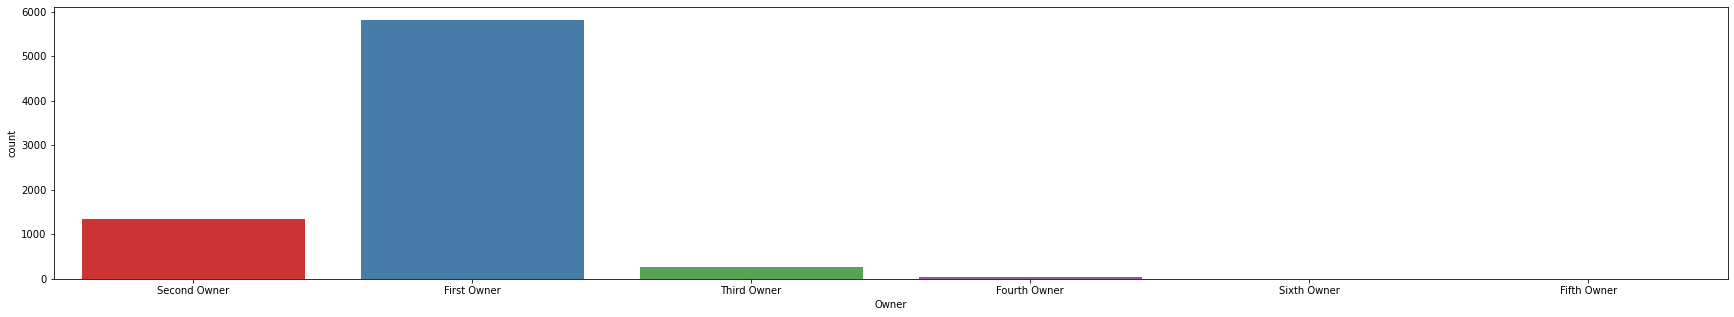

In [88]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Owner'], palette="Set1")

In [89]:
DF['Location'].value_counts()

Delhi                 2101
Bangalore              850
Mumbai                 561
Kolkata                385
Jaipur                 360
                      ... 
Nellore                  1
dharwad                  1
Thiruvananthapuram       1
24 pargana               1
sirohi                   1
Name: Location, Length: 240, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='count'>

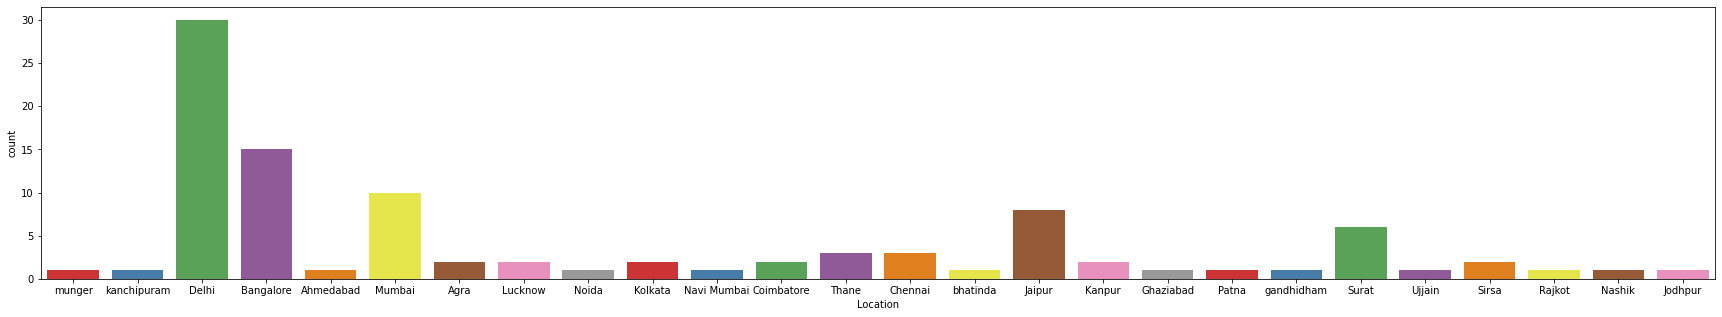

In [90]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Location'][0:100], palette="Set1")

In [91]:
DF['Transmission'].value_counts()

Manual                           6435
Automatic                         920
Automated Manual Transmission     128
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='count'>

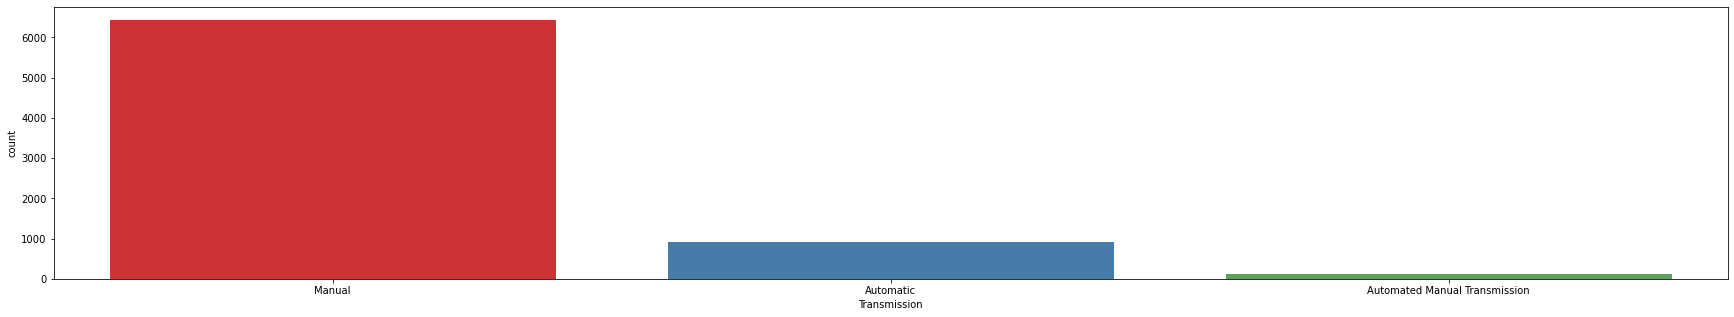

In [92]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Transmission'], palette="Set1")

In [93]:
DF['Brand'].value_counts()

Maruti           2008
Hyundai          1453
Honda             728
Mahindra          687
Toyota            671
Ford              390
Volkswagen        292
Renault           265
Tata              250
Skoda             214
Chevrolet         184
Nissan            117
Kia                71
MG                 48
Fiat               44
Datsun             38
Mitsubishi         18
Jeep                1
Opel                1
Isuzu               1
Mercedes-benz       1
Eicher              1
Name: Brand, dtype: int64

<AxesSubplot:xlabel='Brand', ylabel='count'>

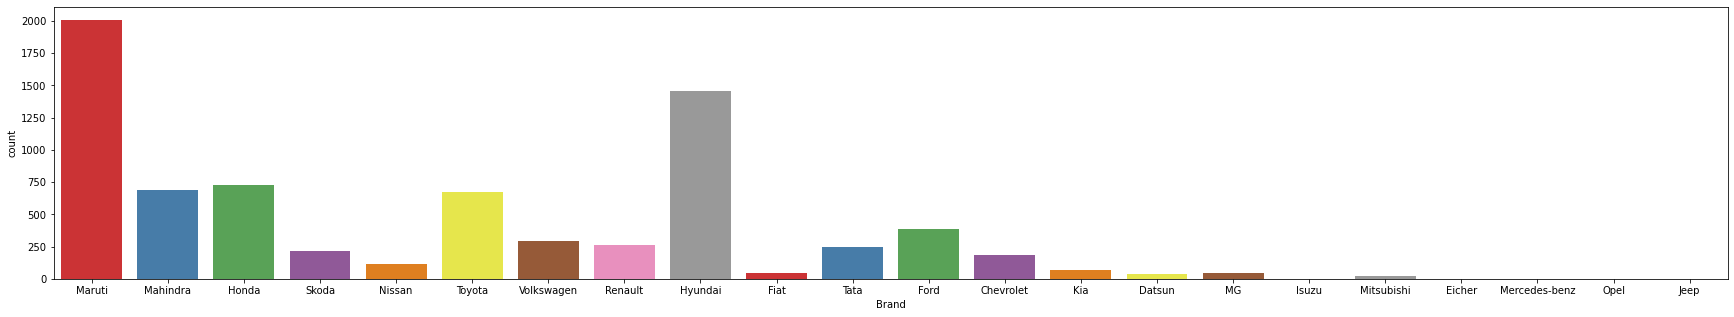

In [94]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(DF['Brand'], palette="Set1")

In [95]:
DF['Model'].value_counts()

Suzuki Swift               319
City                       298
Suzuki Swift Dzire         248
Verna                      243
Suzuki Wagon R             228
                          ... 
Palio Stile                  1
Tiguan                       1
Suzuki Wagon R Stingray      1
Marshal                      1
Gloster                      1
Name: Model, Length: 227, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Model'>

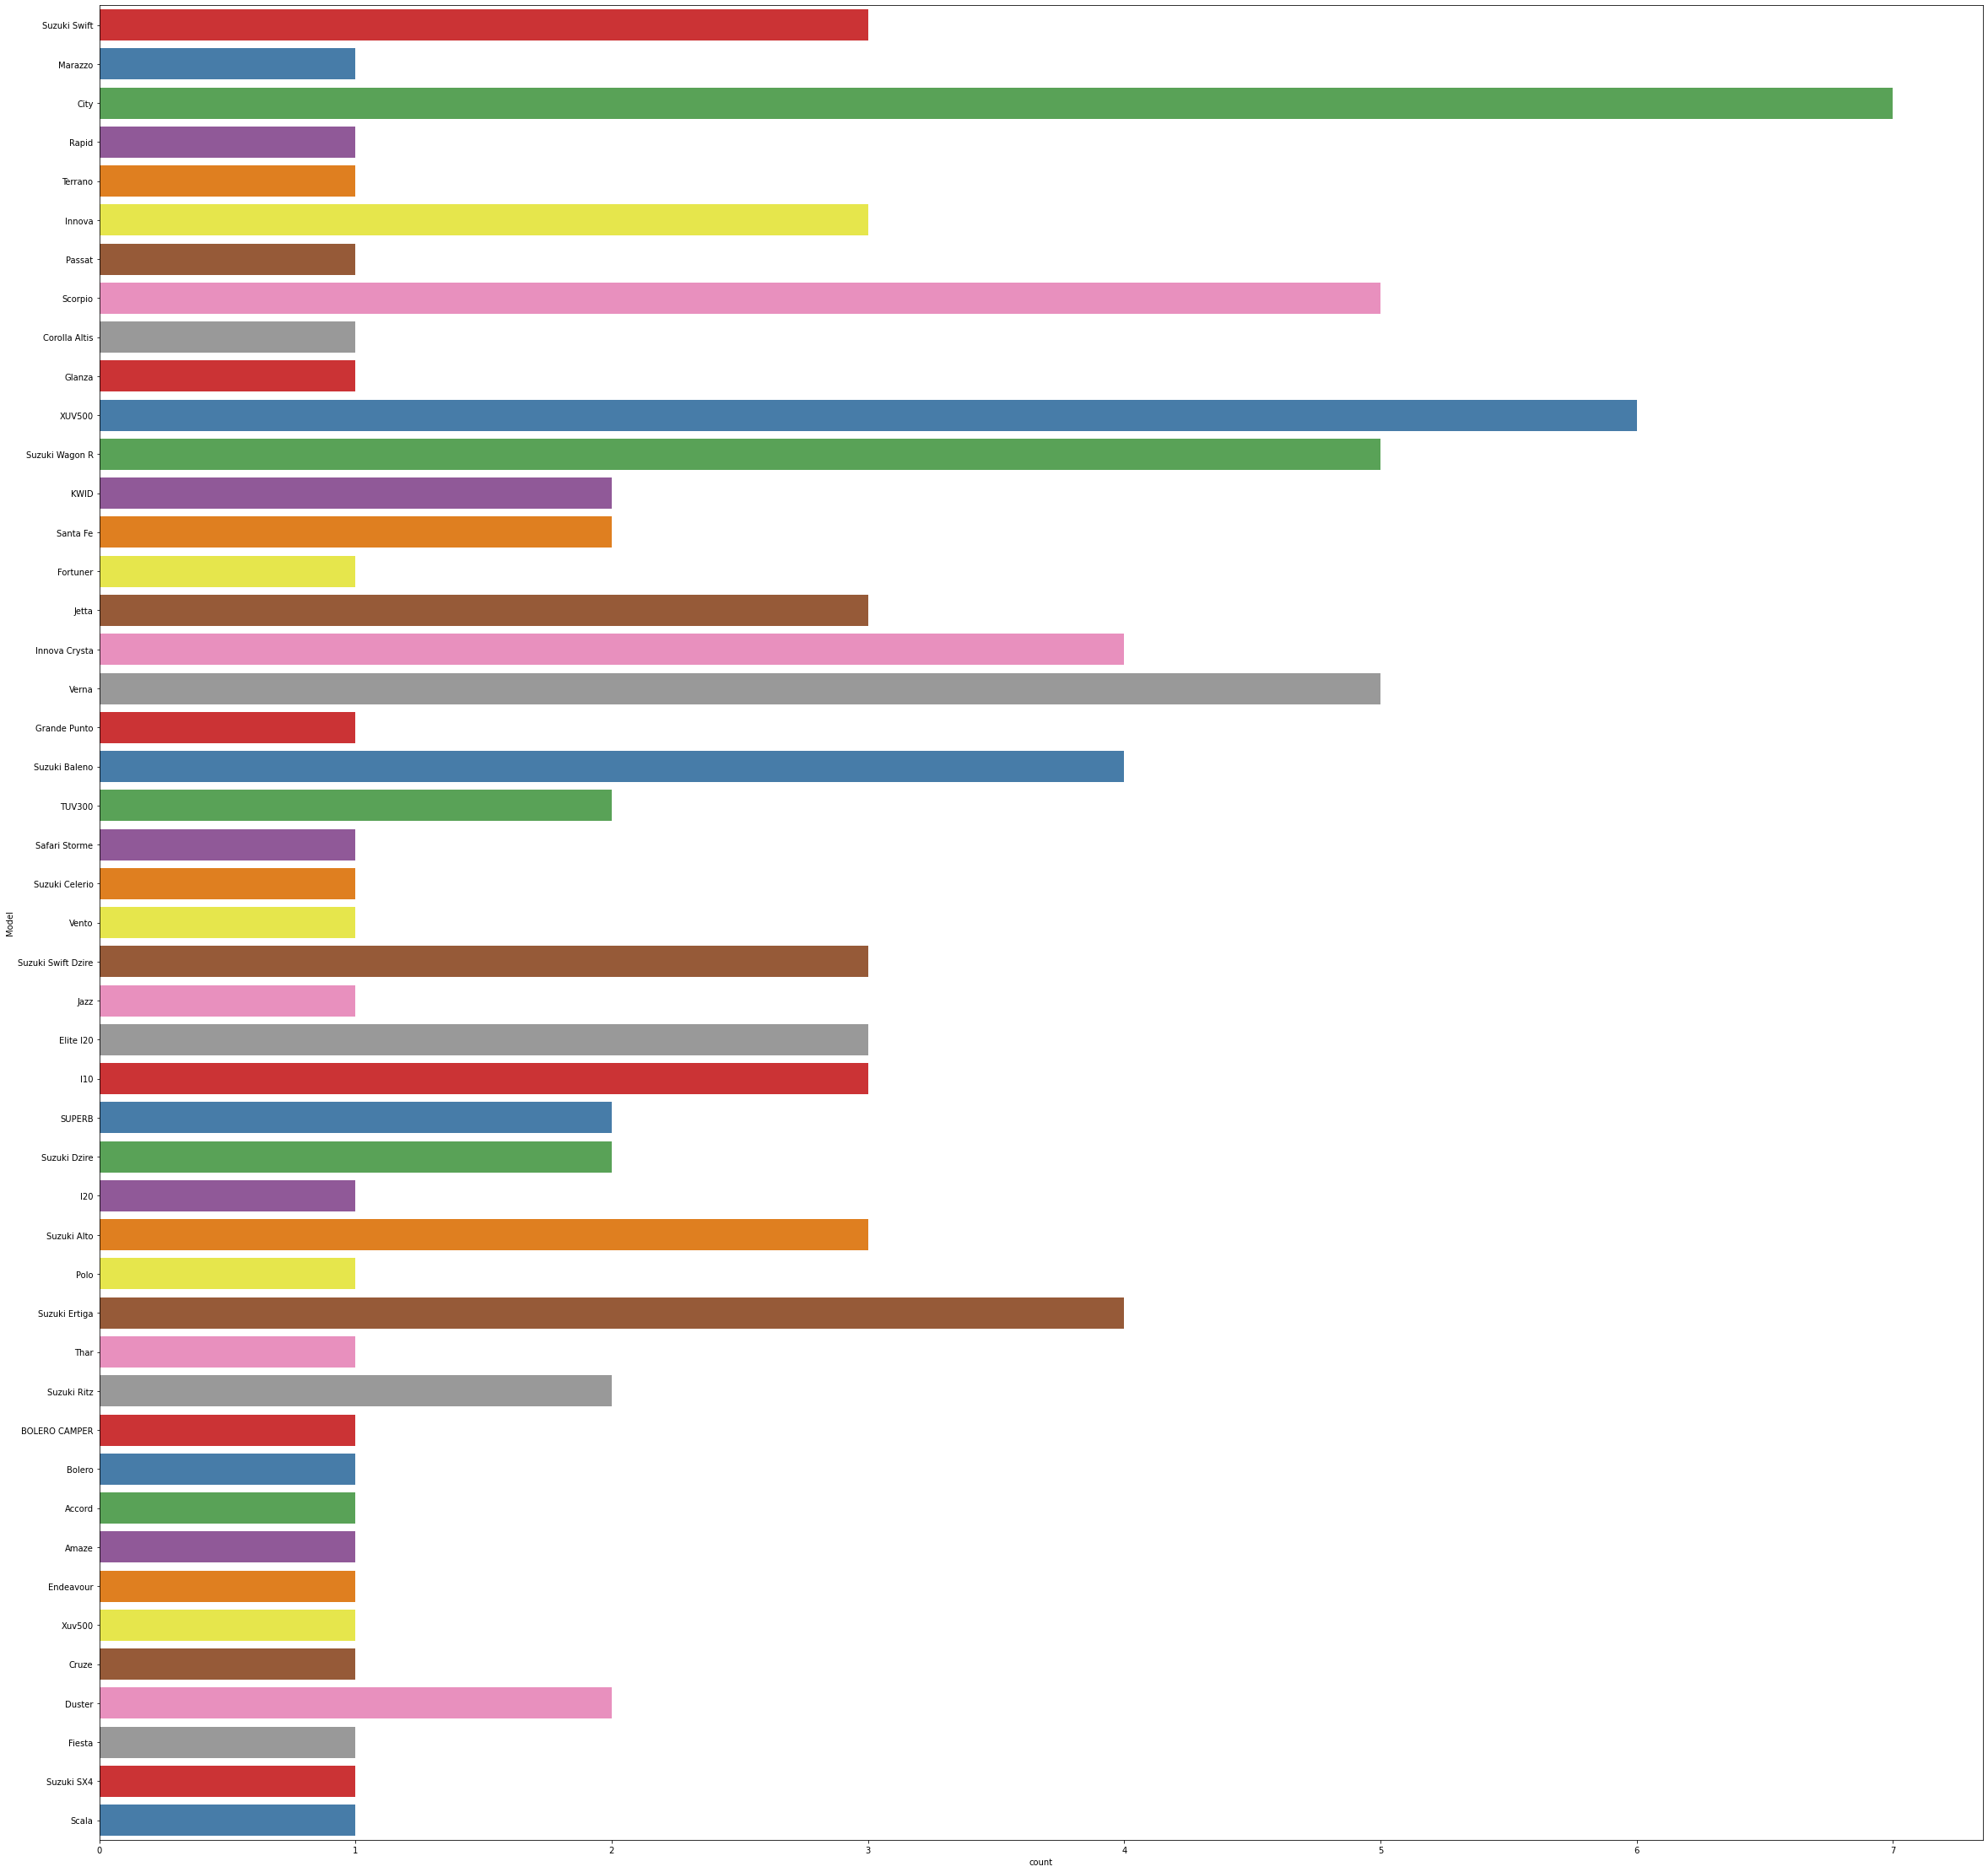

In [96]:
plt.figure(figsize=(40,40),facecolor='white')
sns.countplot(y=DF['Model'][0:100], palette="Set1")

In [97]:
DF['Variant'].value_counts()

Swift VDi                              95
Swift DZire VDi                        80
Swift VXi                              75
Wagon R LXi                            63
Alto LXi                               57
                                       ..
2.0 VX 8 STR                            1
Baleno Zeta 1.2 AT BS6                  1
Omni MPI STD BSIV                       1
i10 Sportz 1.2 Kappa VTVT DUAL TONE     1
2WD AT GLS Diesel                       1
Name: Variant, Length: 1785, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Variant'>

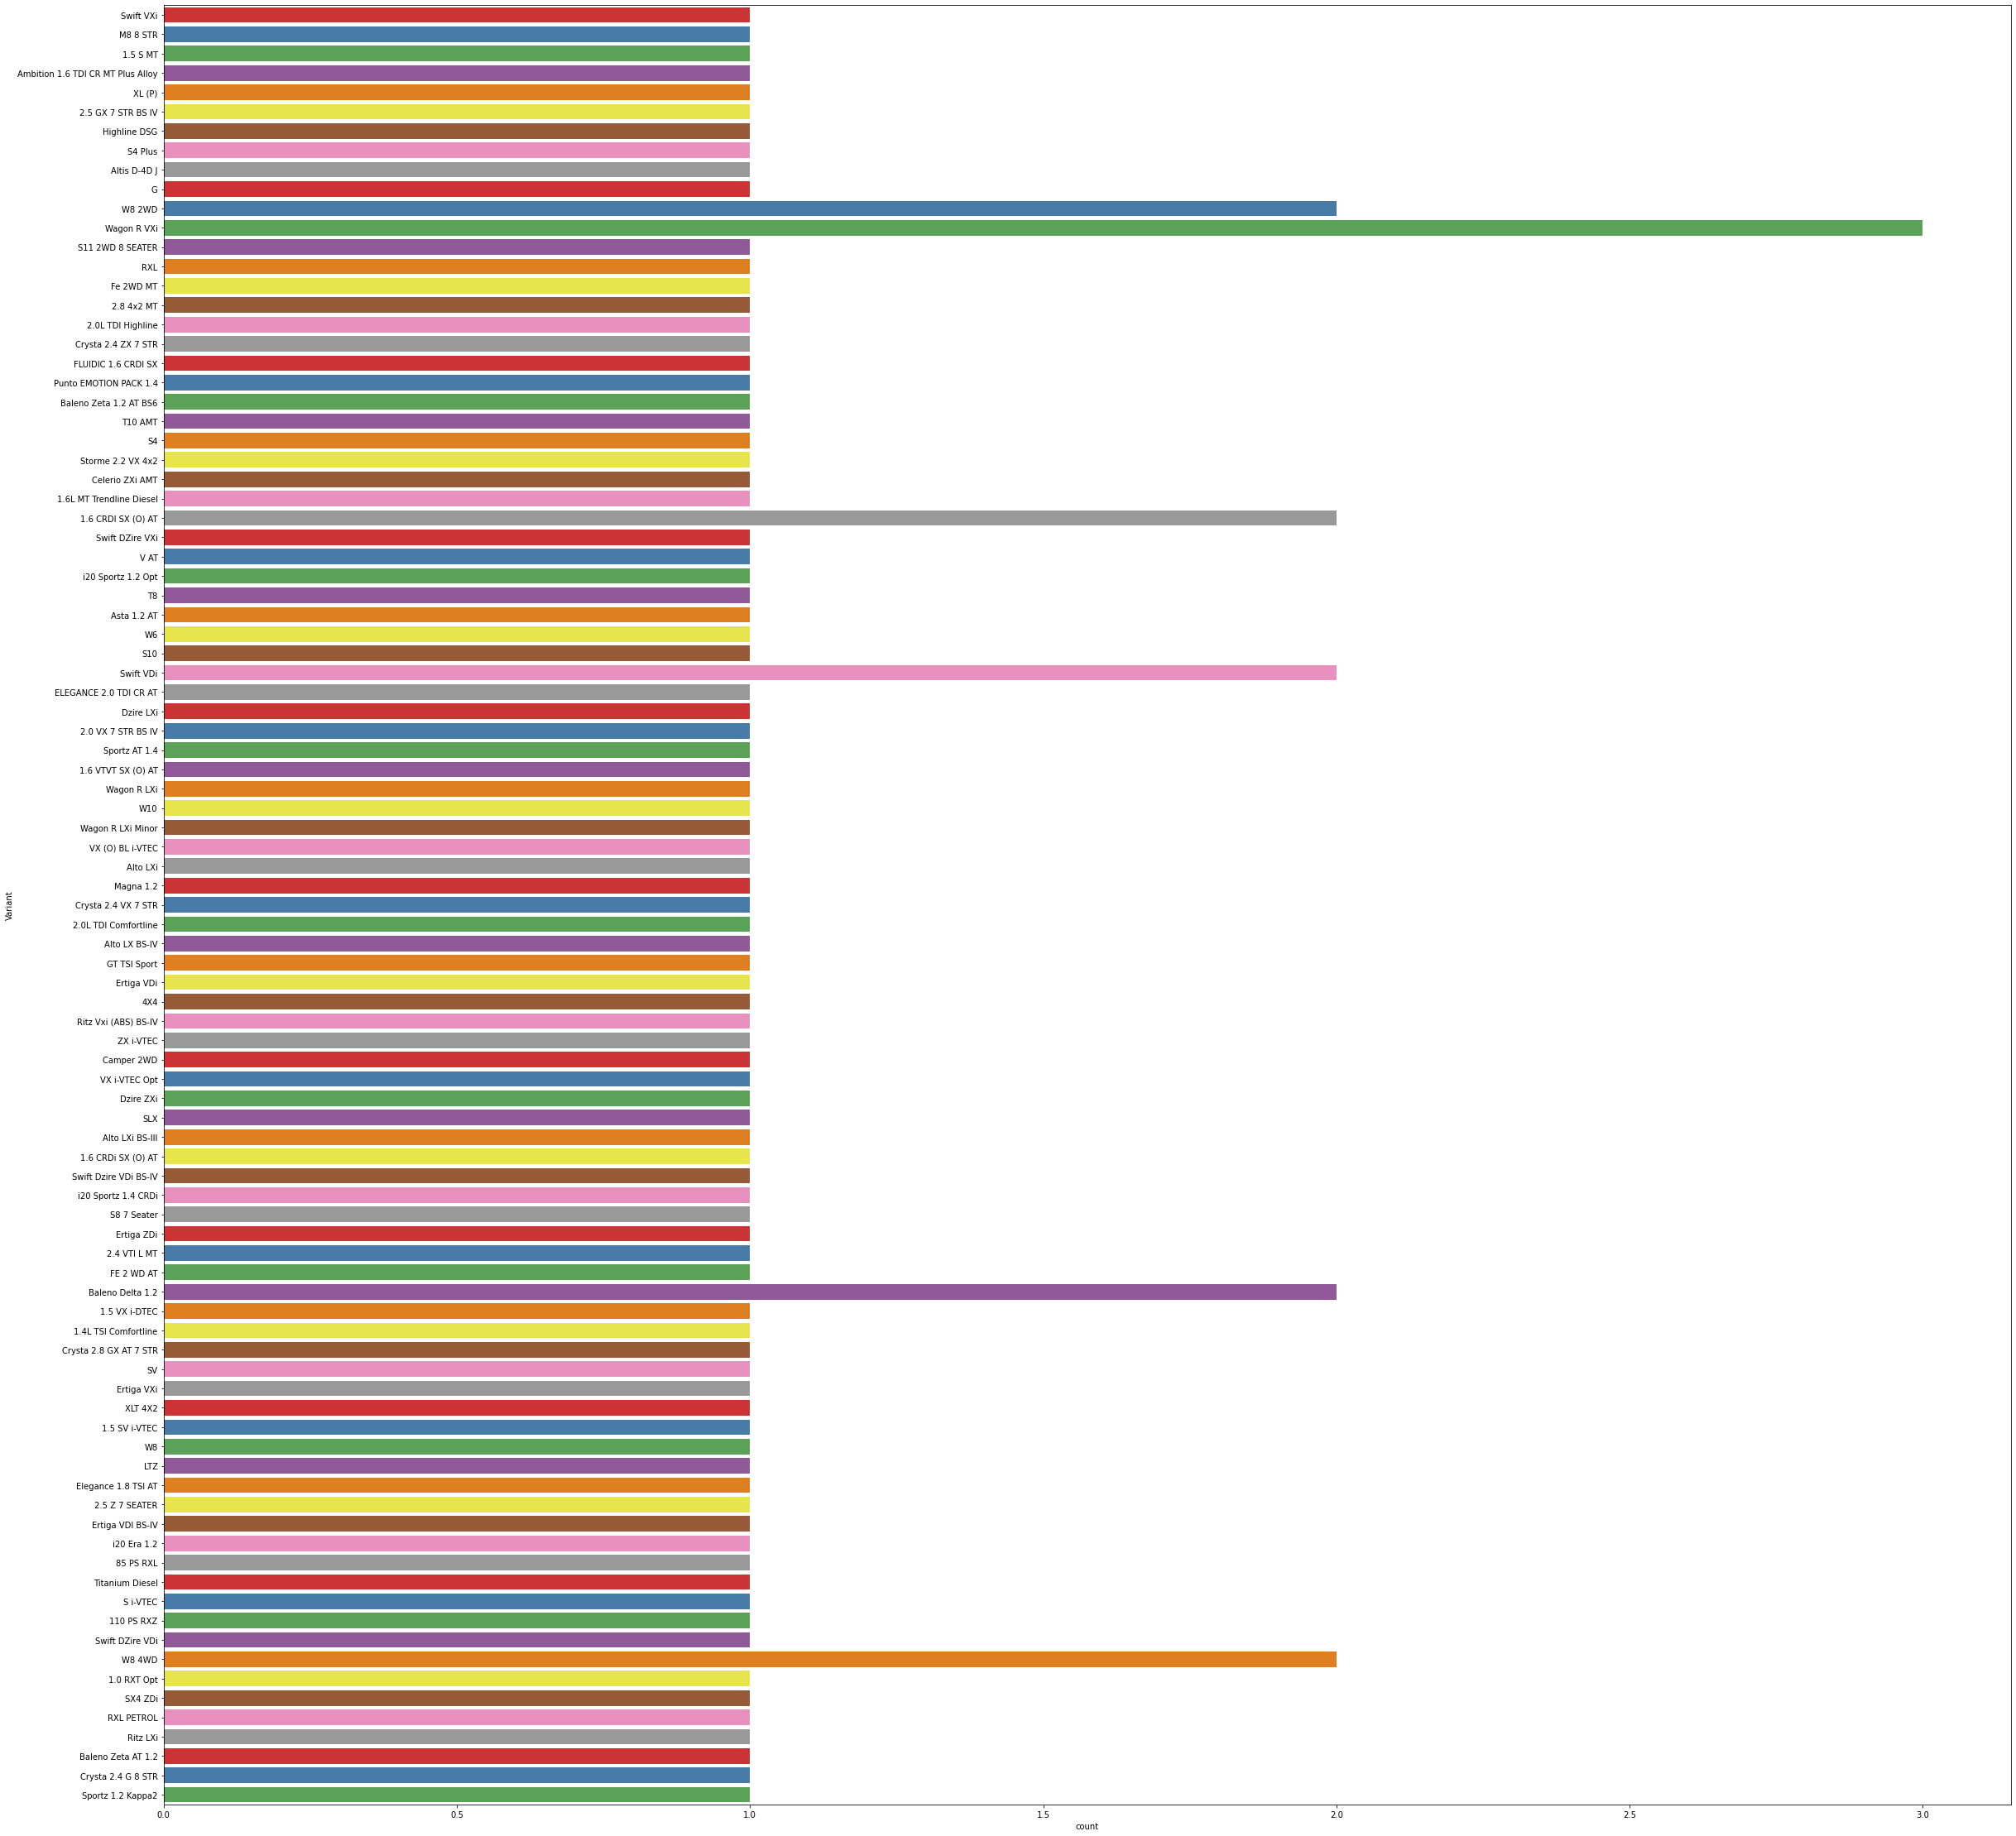

In [98]:
plt.figure(figsize=(40,40),facecolor='white')
sns.countplot(y=DF['Variant'][0:100], palette="Set1")

In [99]:
DF.dtypes[DF.dtypes != 'object'] #Identifying the Continuous non object type Columns

Year                       float64
Total Kilometers Driven    float64
Seating Capacity           float64
Mileage                    float64
Price                      float64
dtype: object

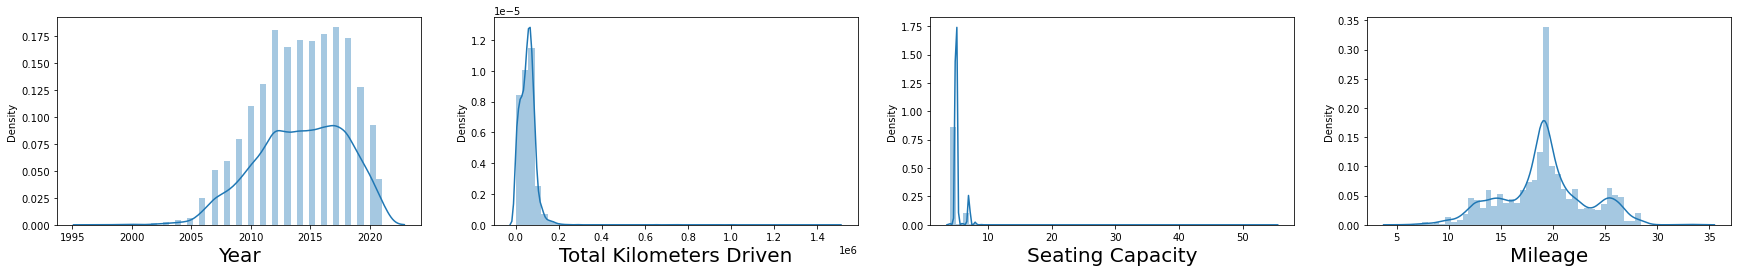

In [100]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
X = DF.drop(columns = 'Price')
for col in X[X.columns[X.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(10,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Year and Mileage columns look normally distributed, while Total kilometers Driven and Seating Capacity are skewed

In [101]:
DF[DF.columns[DF.dtypes != 'object']].skew()

Year                       -0.339892
Total Kilometers Driven    11.284507
Seating Capacity           24.105809
Mileage                    -0.008898
Price                       3.136393
dtype: float64

### Checking for Outliers

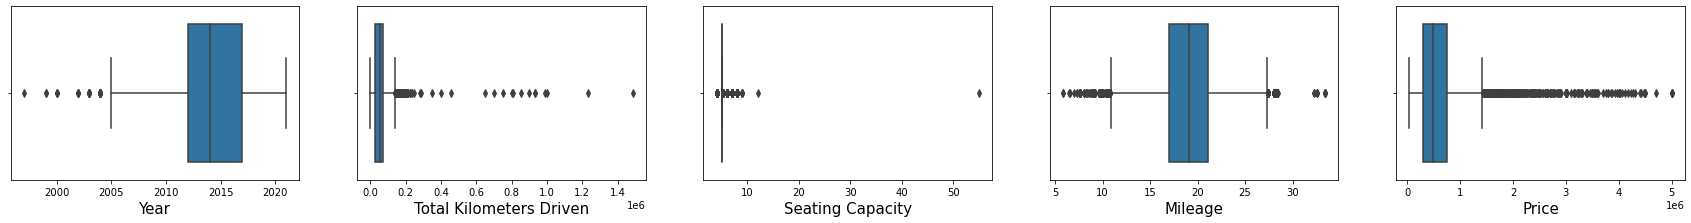

In [102]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in DF[DF.columns[DF.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are considerable outliers in the columns.

#### Removing Outliers using Z score Method

In [103]:
df2 =DF[DF.columns[DF.dtypes != 'object']].copy() #making a copy of the continuous data type columns with outliers.

In [104]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [105]:
df3.shape

(7207, 5)

In [106]:
df2.shape

(7483, 5)

##### Data loss %:

In [107]:
loss=(7483-7207)/7207 * 100
loss

3.8296101012904122

3.82% data loss is acceptable.

In [108]:
dropindx = DF.index.difference(df3.index)

In [109]:
dropindx

Int64Index([   1,   15,   25,   98,  136,  141,  198,  213,  241,  268,
            ...
            7255, 7264, 7363, 7395, 7398, 7414, 7415, 7450, 7454, 7480],
           dtype='int64', length=276)

In [110]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [111]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

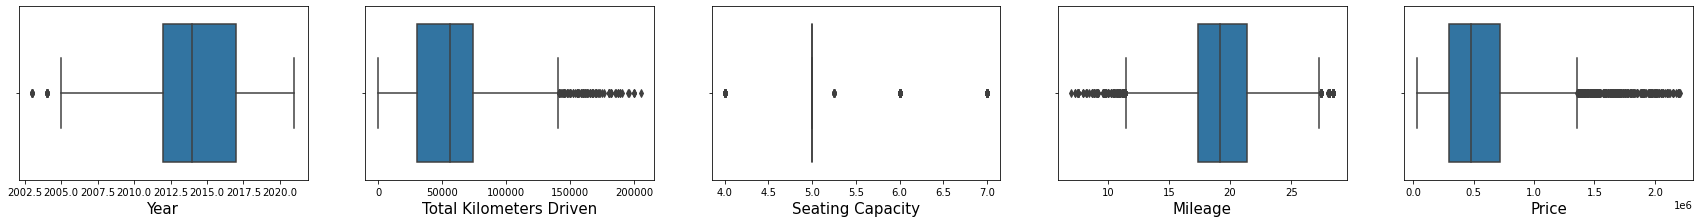

In [112]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in DF[DF.columns[DF.dtypes != 'object']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

Considerable number of outliers has been removed

### Extracting Age data from Year Column to better understand its relationship with Target Column.

In [113]:
DF['Car Age'] = DF['Year'].apply(lambda y: 2021 - y)

In [114]:
DF

,Year,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,2008.0,Hatchback,99500.0,Petrol,Second Owner,munger,Manual,5.0,20.400000,180000.0,Maruti,Suzuki Swift,Swift VXi,13.0
1,2012.0,Sedan,77000.0,Petrol,First Owner,Delhi,Manual,5.0,17.800000,350000.0,Honda,City,1.5 S MT,9.0
2,2013.0,Sedan,58000.0,Diesel,First Owner,Bangalore,Manual,5.0,20.500000,480000.0,Skoda,Rapid,Ambition 1.6 TDI CR MT Plus Alloy,8.0
3,2018.0,SUV,68000.0,Petrol,First Owner,Ahmedabad,Manual,5.0,13.240000,654050.0,Nissan,Terrano,XL (P),3.0
4,2015.0,MUV,92000.0,Diesel,First Owner,Delhi,Manual,5.0,19.136781,850000.0,Toyota,Innova,2.5 GX 7 STR BS IV,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,2018.0,Pick Up,90000.0,Diesel,First Owner,Jaipur,Manual,5.0,19.136781,850000.0,Mahindra,BOLERO CAMPER,Camper 2WD,3.0
7203,2019.0,Hatchback,13000.0,Petrol,First Owner,Delhi,Manual,5.0,18.600000,715000.0,Hyundai,Elite I20,i20 Sportz 1.2,2.0
7204,2017.0,Sedan,33000.0,Petrol,First Owner,Ahmedabad,Automatic,5.0,15.230000,1299997.0,Toyota,Corolla Altis,Altis 1.8 G AT,4.0
7205,2016.0,Hatchback,16000.0,Petrol,First Owner,Kolkata,Manual,5.0,21.100000,210000.0,Hyundai,Eon,D-Lite +,5.0


#### Dropping Year Column since it is no longer needed

In [115]:
DF.drop(columns = ['Year'],inplace=True)

In [116]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,Hatchback,99500.0,Petrol,Second Owner,munger,Manual,5.0,20.400000,180000.0,Maruti,Suzuki Swift,Swift VXi,13.0
1,Sedan,77000.0,Petrol,First Owner,Delhi,Manual,5.0,17.800000,350000.0,Honda,City,1.5 S MT,9.0
2,Sedan,58000.0,Diesel,First Owner,Bangalore,Manual,5.0,20.500000,480000.0,Skoda,Rapid,Ambition 1.6 TDI CR MT Plus Alloy,8.0
3,SUV,68000.0,Petrol,First Owner,Ahmedabad,Manual,5.0,13.240000,654050.0,Nissan,Terrano,XL (P),3.0
4,MUV,92000.0,Diesel,First Owner,Delhi,Manual,5.0,19.136781,850000.0,Toyota,Innova,2.5 GX 7 STR BS IV,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,Pick Up,90000.0,Diesel,First Owner,Jaipur,Manual,5.0,19.136781,850000.0,Mahindra,BOLERO CAMPER,Camper 2WD,3.0
7203,Hatchback,13000.0,Petrol,First Owner,Delhi,Manual,5.0,18.600000,715000.0,Hyundai,Elite I20,i20 Sportz 1.2,2.0
7204,Sedan,33000.0,Petrol,First Owner,Ahmedabad,Automatic,5.0,15.230000,1299997.0,Toyota,Corolla Altis,Altis 1.8 G AT,4.0
7205,Hatchback,16000.0,Petrol,First Owner,Kolkata,Manual,5.0,21.100000,210000.0,Hyundai,Eon,D-Lite +,5.0


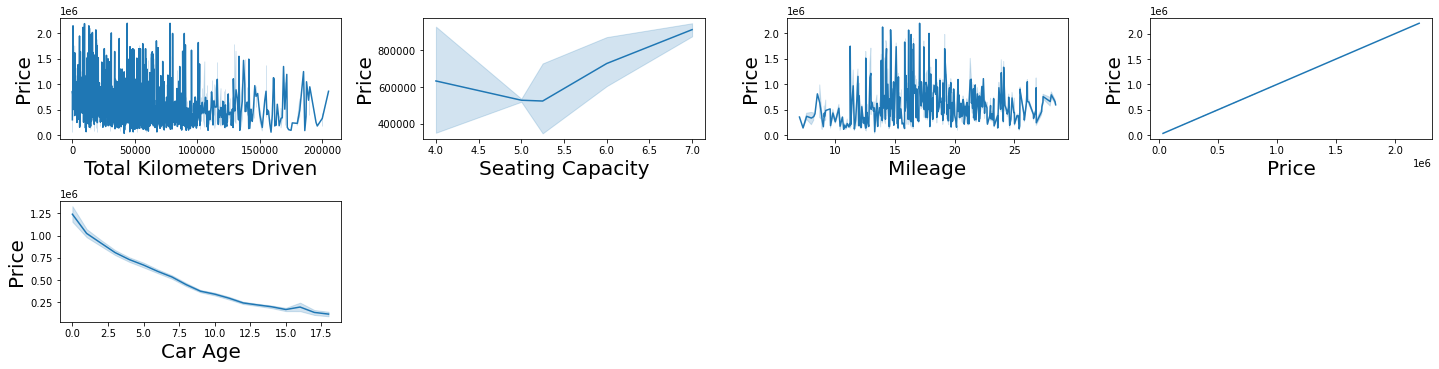

In [117]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['Price']
DF.drop(columns=['Price'])
for col in DF[DF.columns[DF.dtypes != 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.lineplot(DF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following Observations are made from graphs above:
    
There is a negative correlation between Total Kilometers Driven and Price

Cars with Mileage between 14 km/l and 19 km/l have the highest prices

There is a negative correlation between Car Age and Price

There is a positive correlation between Seating capacity and Price

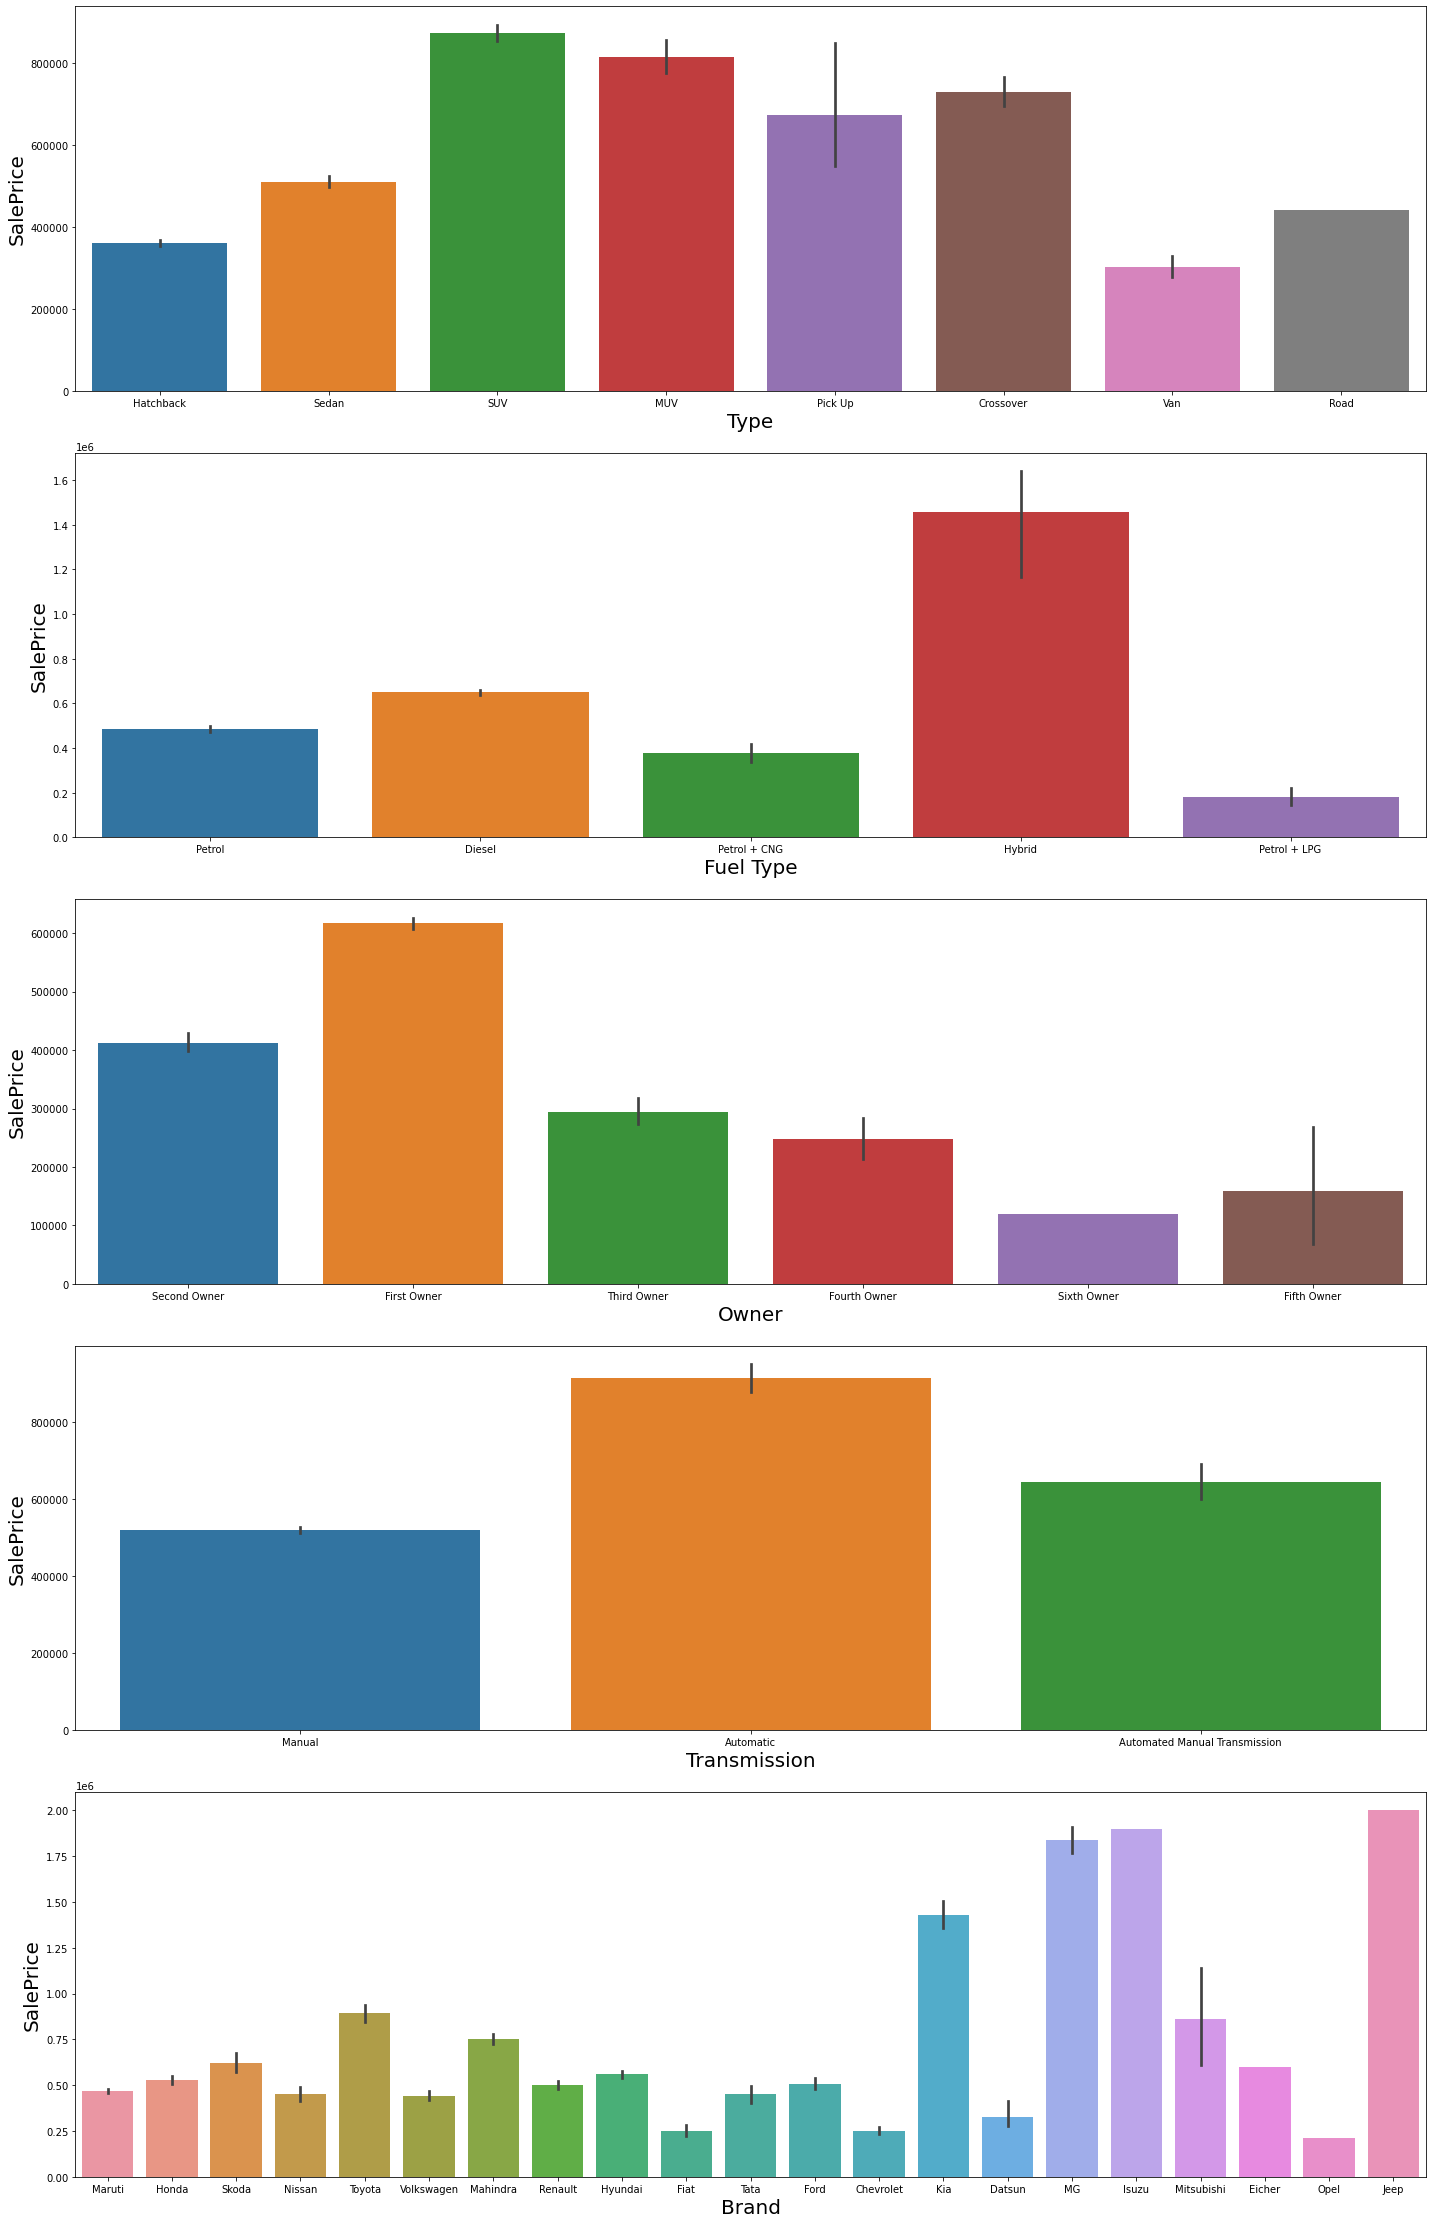

In [119]:
plt.figure(figsize=(20,31),facecolor='white')
plotnum=1
y = DF['Price']
for col in DF[['Type','Fuel Type','Owner','Transmission','Brand']]:
    if plotnum<=40:
        plt.subplot(5,1,plotnum)
        sns.barplot(DF[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

<AxesSubplot:xlabel='Price', ylabel='Location'>

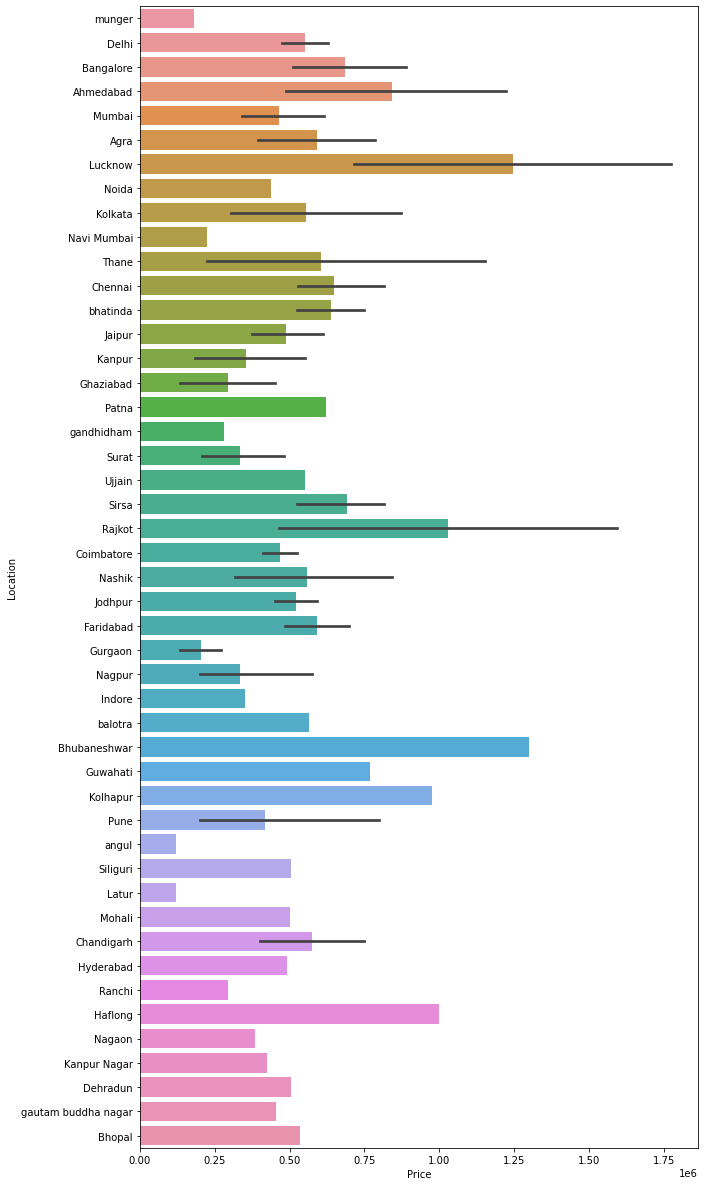

In [120]:
plt.figure(figsize=(10,21),facecolor='white')
sns.barplot(y=DF['Location'][0:240],x=DF['Price'])

<AxesSubplot:xlabel='Price', ylabel='Model'>

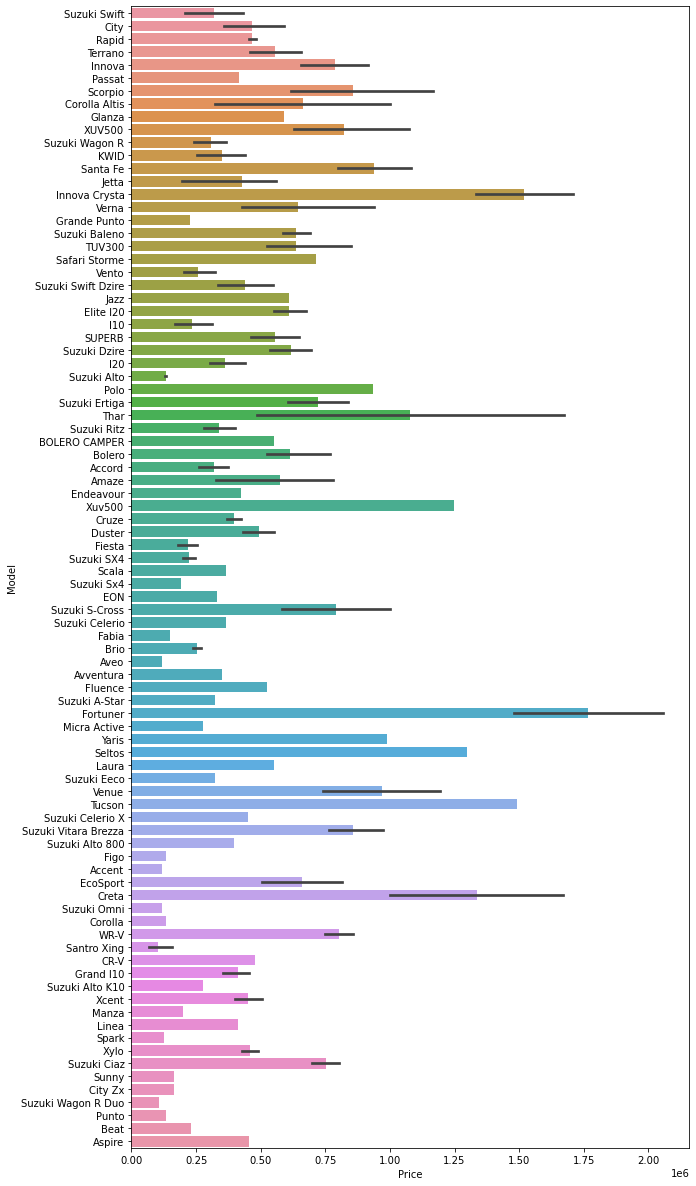

In [121]:
plt.figure(figsize=(10,21),facecolor='white')
sns.barplot(y=DF['Model'][0:240],x=DF['Price'])

Following Observations are made from graphs above:
    
SUV,MUV,Pickup and Crossover type Cars have the highest Prices

Hybrid Fuel Type Cars are the costliest

As the Number of previous owners increases, the price of used car decreases, so there is a negative correlation between ownership and Car Price

Automatic Cars have the highest prices

Kia,MG,Isuzu and Jeep are amongst the most expensive Car Brands while Maruti,Volkswagen,Chevrolet,Opel,Tata,Honda,Fiat and Ford are the most affordable Car Brands

Car Prices are highest in Lucknow,Rajkot,Bhubhaneshwar,Kohlapur,Ahmedabad and Haflong

Creta,Fortuner,Tucson,Seltos,Xuv500,Thar,Innova Crysta are amongst the most expensive car models, while Beat,Punto,Wagon R,Santro Xing,Alto,Fiesta are amongst the most affordable


<AxesSubplot:xlabel='Type', ylabel='Price'>

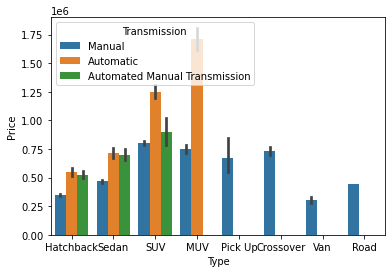

In [124]:
sns.barplot(DF['Type'],DF['Price'],hue = DF['Transmission'])

SUV and MUV cars with Automatic Transmission are the costliest

<AxesSubplot:xlabel='Fuel Type', ylabel='Price'>

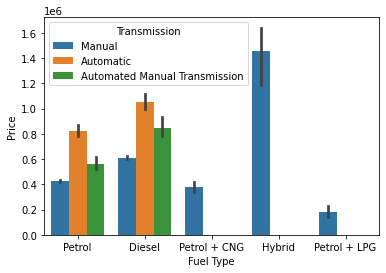

In [125]:
sns.barplot(DF['Fuel Type'],DF['Price'],hue = DF['Transmission'])

Hybrid Cars with Manual Transmission have the highest price followed by Diesel and Petrol cars with Automatic Transmission

<AxesSubplot:xlabel='Type', ylabel='Price'>

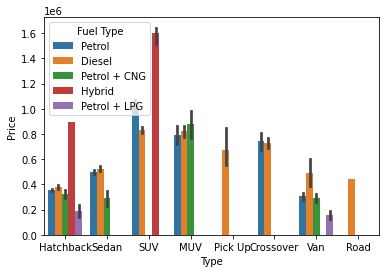

In [126]:
sns.barplot(DF['Type'],DF['Price'],hue = DF['Fuel Type'])

Hybrid Type Hatchback and SUV Cars are the most expensive

<AxesSubplot:xlabel='Brand', ylabel='Price'>

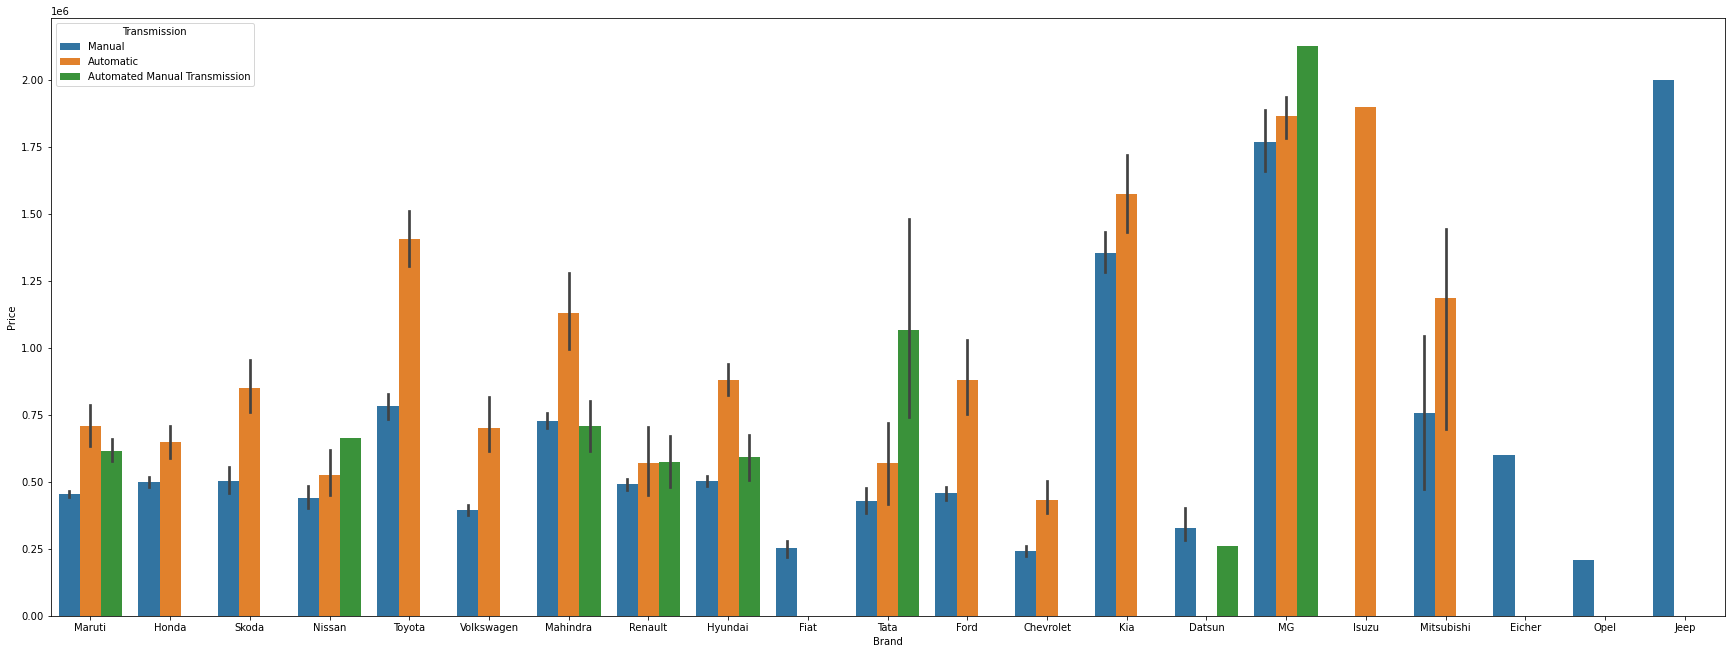

In [127]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(DF['Brand'],DF['Price'],hue = DF['Transmission'])

Automatic Transmission Variants are the most expensive cars of most car brands

<AxesSubplot:xlabel='Brand', ylabel='Price'>

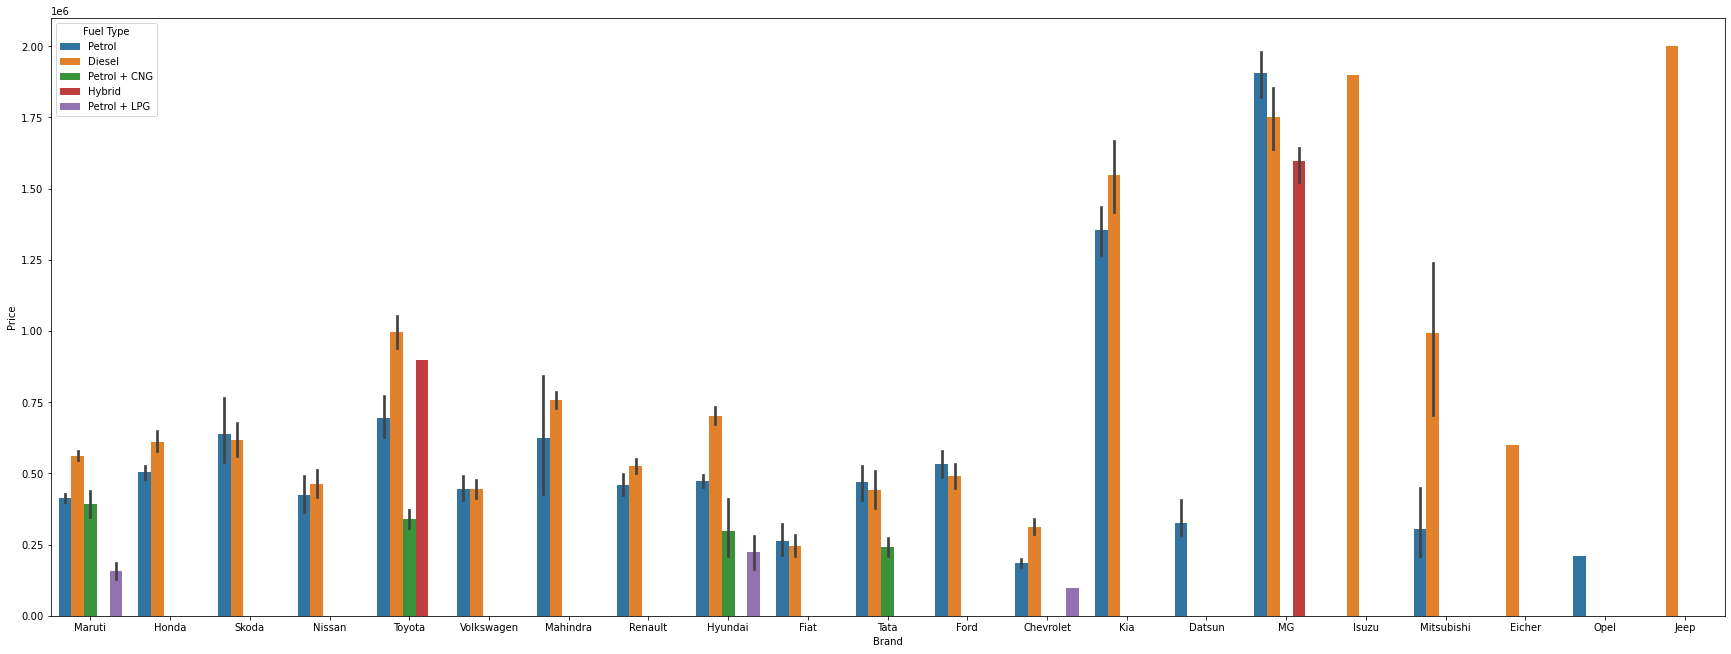

In [128]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(DF['Brand'],DF['Price'],hue = DF['Fuel Type'])

Diesel Variants,followed by Petrol Variants are the most expensive cars of most car brands

### Encoding Categorical Columns

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,Hatchback,99500.0,Petrol,Second Owner,munger,Manual,5.0,20.400000,180000.0,Maruti,Suzuki Swift,Swift VXi,13.0
1,Sedan,77000.0,Petrol,First Owner,Delhi,Manual,5.0,17.800000,350000.0,Honda,City,1.5 S MT,9.0
2,Sedan,58000.0,Diesel,First Owner,Bangalore,Manual,5.0,20.500000,480000.0,Skoda,Rapid,Ambition 1.6 TDI CR MT Plus Alloy,8.0
3,SUV,68000.0,Petrol,First Owner,Ahmedabad,Manual,5.0,13.240000,654050.0,Nissan,Terrano,XL (P),3.0
4,MUV,92000.0,Diesel,First Owner,Delhi,Manual,5.0,19.136781,850000.0,Toyota,Innova,2.5 GX 7 STR BS IV,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,Pick Up,90000.0,Diesel,First Owner,Jaipur,Manual,5.0,19.136781,850000.0,Mahindra,BOLERO CAMPER,Camper 2WD,3.0
7203,Hatchback,13000.0,Petrol,First Owner,Delhi,Manual,5.0,18.600000,715000.0,Hyundai,Elite I20,i20 Sportz 1.2,2.0
7204,Sedan,33000.0,Petrol,First Owner,Ahmedabad,Automatic,5.0,15.230000,1299997.0,Toyota,Corolla Altis,Altis 1.8 G AT,4.0
7205,Hatchback,16000.0,Petrol,First Owner,Kolkata,Manual,5.0,21.100000,210000.0,Hyundai,Eon,D-Lite +,5.0


In [131]:
DF['Owner'] = DF.Owner.map({'First Owner':1,'Second Owner':2,'Third Owner':3, 'Fourth Owner': 4, 'Fifth Owner': 5,'Sixth Owner': 6})

In [132]:
DF['Transmission'] = DF.Transmission.map({'Manual':1,'Automatic':2,'Automated Manual Transmission':3})

In [133]:
DF['Fuel Type'] = DF['Fuel Type'].map({'Diesel':1,'Petrol':2,'Petrol + CNG':3, 'Petrol + LPG': 4, 'Hybrid': 5})

In [134]:
DF['Type'] = DF.Type.map({'Hatchback':1,'Sedan':2,'SUV':3, 'MUV': 4, 'Crossover': 5,'Van': 6,'Pick Up': 7,'Road':8})

####  Encoding 'Location','Model' and 'Variant' using LabelEncoder()

In [135]:
labenc = LabelEncoder()

In [136]:
for col in DF[['Location','Model','Variant']]:
    DF[col] = labenc.fit_transform(DF[col])

In [137]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Brand,Model,Variant,Car Age
0,1,99500.0,2,2,205,1,5.0,20.400000,180000.0,Maruti,177,1283,13.0
1,2,77000.0,2,1,28,1,5.0,17.800000,350000.0,Honda,25,78,9.0
2,2,58000.0,1,1,10,1,5.0,20.500000,480000.0,Skoda,130,415,8.0
3,3,68000.0,2,1,2,1,5.0,13.240000,654050.0,Nissan,192,1531,3.0
4,4,92000.0,1,1,28,1,5.0,19.136781,850000.0,Toyota,87,258,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,7,90000.0,1,1,53,1,5.0,19.136781,850000.0,Mahindra,13,490,3.0
7203,1,13000.0,2,1,28,1,5.0,18.600000,715000.0,Hyundai,45,1694,2.0
7204,2,33000.0,2,1,2,2,5.0,15.230000,1299997.0,Toyota,34,370,4.0
7205,1,16000.0,2,1,73,1,5.0,21.100000,210000.0,Hyundai,48,601,5.0


####  Encoding 'Brand' using get_dummies()

In [138]:
dumm = pd.get_dummies(DF['Brand']) 

In [139]:
dumm

,Chevrolet,Datsun,Eicher,Fiat,Ford,Honda,Hyundai,Isuzu,Jeep,Kia,...,Mahindra,Maruti,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7203,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7205,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
DF = DF.join(dumm)

In [141]:
DF.drop(columns=['Brand'],inplace=True)

In [142]:
DF

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Model,...,Mahindra,Maruti,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen
0,1,99500.0,2,2,205,1,5.0,20.400000,180000.0,177,...,0,1,0,0,0,0,0,0,0,0
1,2,77000.0,2,1,28,1,5.0,17.800000,350000.0,25,...,0,0,0,0,0,0,0,0,0,0
2,2,58000.0,1,1,10,1,5.0,20.500000,480000.0,130,...,0,0,0,0,0,0,1,0,0,0
3,3,68000.0,2,1,2,1,5.0,13.240000,654050.0,192,...,0,0,0,1,0,0,0,0,0,0
4,4,92000.0,1,1,28,1,5.0,19.136781,850000.0,87,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,7,90000.0,1,1,53,1,5.0,19.136781,850000.0,13,...,1,0,0,0,0,0,0,0,0,0
7203,1,13000.0,2,1,28,1,5.0,18.600000,715000.0,45,...,0,0,0,0,0,0,0,0,0,0
7204,2,33000.0,2,1,2,2,5.0,15.230000,1299997.0,34,...,0,0,0,0,0,0,0,0,1,0
7205,1,16000.0,2,1,73,1,5.0,21.100000,210000.0,48,...,0,0,0,0,0,0,0,0,0,0


### Finding Correlation between Feature and Target columns

In [143]:
d_corr =DF.corr()

In [144]:
d_corr

,Type,Total Kilometers Driven,Fuel Type,Owner,Location,Transmission,Seating Capacity,Mileage,Price,Model,...,Mahindra,Maruti,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen
Type,1.000000,0.005219,-0.321325,-0.083938,-0.040848,0.011611,0.442651,-0.231036,0.456082,0.053380,...,0.293300,-0.134728,0.029416,0.004216,-0.011975,0.073335,-0.018382,-0.004064,0.226199,-0.097082
Total Kilometers Driven,0.005219,1.000000,-0.196840,0.325387,0.100307,-0.095070,-0.031018,-0.123402,-0.320234,-0.051423,...,0.011585,-0.076167,0.045346,0.014597,0.007582,-0.035659,0.020773,0.028796,0.134275,0.060490
Fuel Type,-0.321325,-0.196840,1.000000,0.050725,0.001174,0.074327,-0.204542,-0.181258,-0.216617,-0.060735,...,-0.287062,0.173769,-0.029195,-0.038968,0.010325,-0.050061,-0.074393,-0.046322,-0.087382,-0.056461
Owner,-0.083938,0.325387,0.050725,1.000000,0.043709,-0.037452,-0.068594,-0.135338,-0.258323,-0.032382,...,-0.036861,-0.032283,0.029300,-0.000471,-0.005771,-0.042716,0.022190,0.014677,0.005427,0.007998
Location,-0.040848,0.100307,0.001174,0.043709,1.000000,-0.026324,-0.005154,0.005400,-0.121846,-0.006105,...,-0.024047,0.013574,-0.000904,0.028948,-0.012127,-0.009947,-0.026645,0.044220,-0.042196,0.021330
Transmission,0.011611,-0.095070,0.074327,-0.037452,-0.026324,1.000000,-0.013369,-0.079801,0.278859,-0.036412,...,-0.057962,-0.044457,0.012222,-0.016822,-0.004312,0.013879,0.087176,-0.024399,0.021286,0.008302
Seating Capacity,0.442651,-0.031018,-0.204542,-0.068594,-0.005154,-0.013369,1.000000,-0.147891,0.295230,0.076759,...,0.314211,-0.027472,0.015174,-0.036608,-0.003743,-0.018939,-0.055050,0.011488,0.145595,-0.064646
Mileage,-0.231036,-0.123402,-0.181258,-0.135338,0.005400,-0.079801,-0.147891,1.000000,-0.109876,0.194681,...,-0.152399,0.351770,-0.079479,0.038922,-0.033050,0.070098,-0.076027,-0.019171,-0.269350,-0.017851
Price,0.456082,-0.320234,-0.216617,-0.258323,-0.121846,0.278859,0.295230,-0.109876,1.000000,-0.020397,...,0.159167,-0.160343,0.037601,-0.039895,-0.011210,-0.033415,0.027110,-0.057697,0.249803,-0.066596
Model,0.053380,-0.051423,-0.060735,-0.032382,-0.006105,-0.036412,0.076759,0.194681,-0.020397,1.000000,...,0.237613,0.518510,-0.007038,0.066586,-0.014493,-0.137295,0.018921,0.014554,-0.212948,0.095741


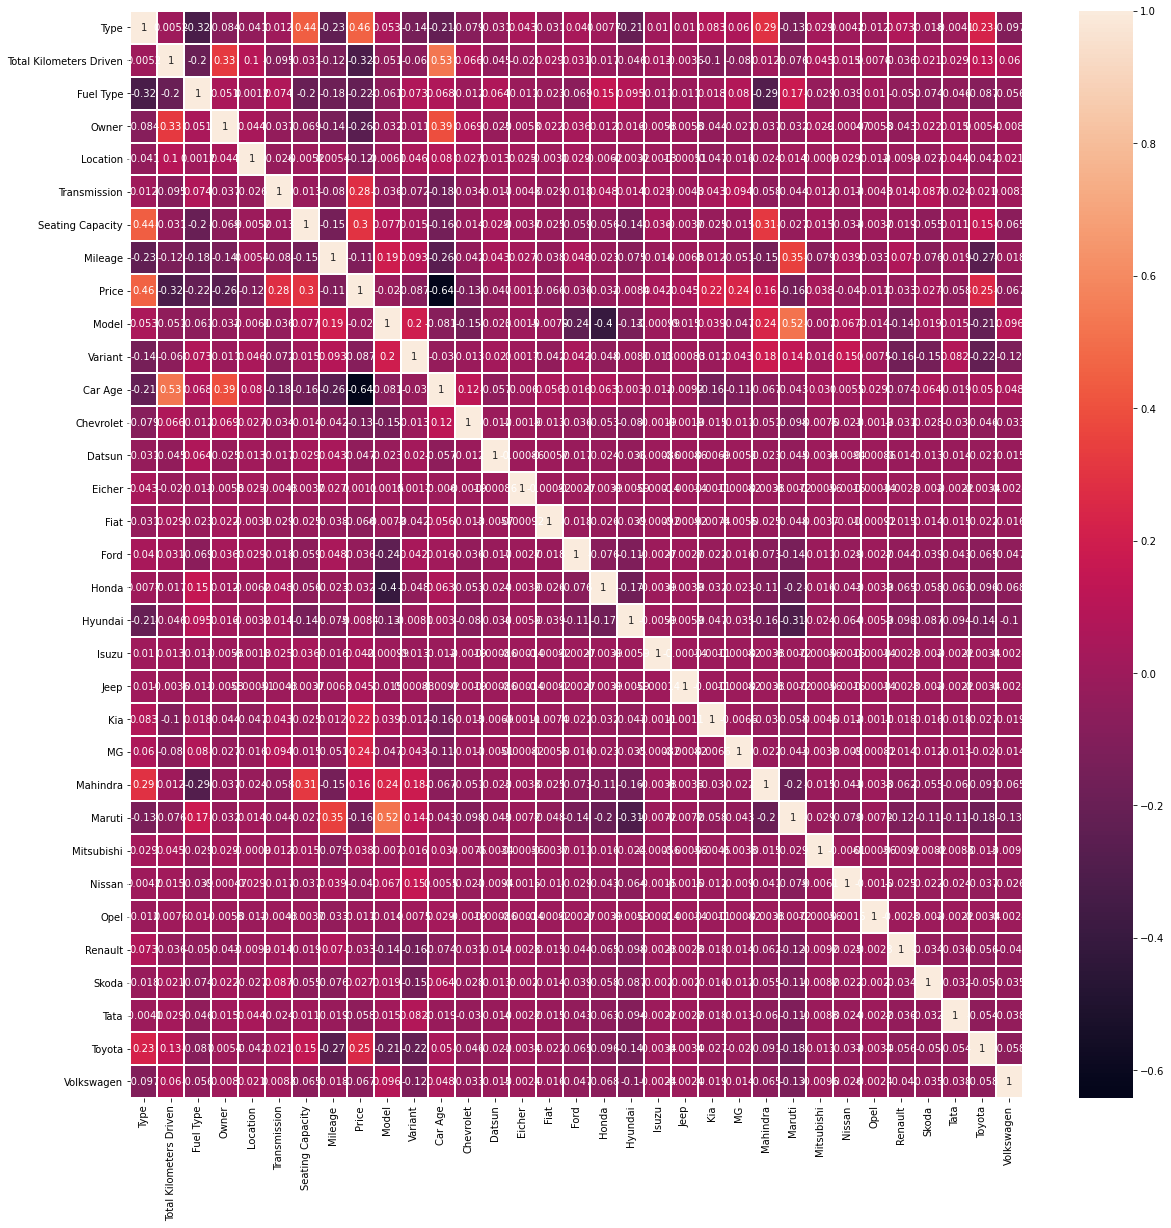

In [145]:
plt.figure(figsize=(20,20))
sns.heatmap(d_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

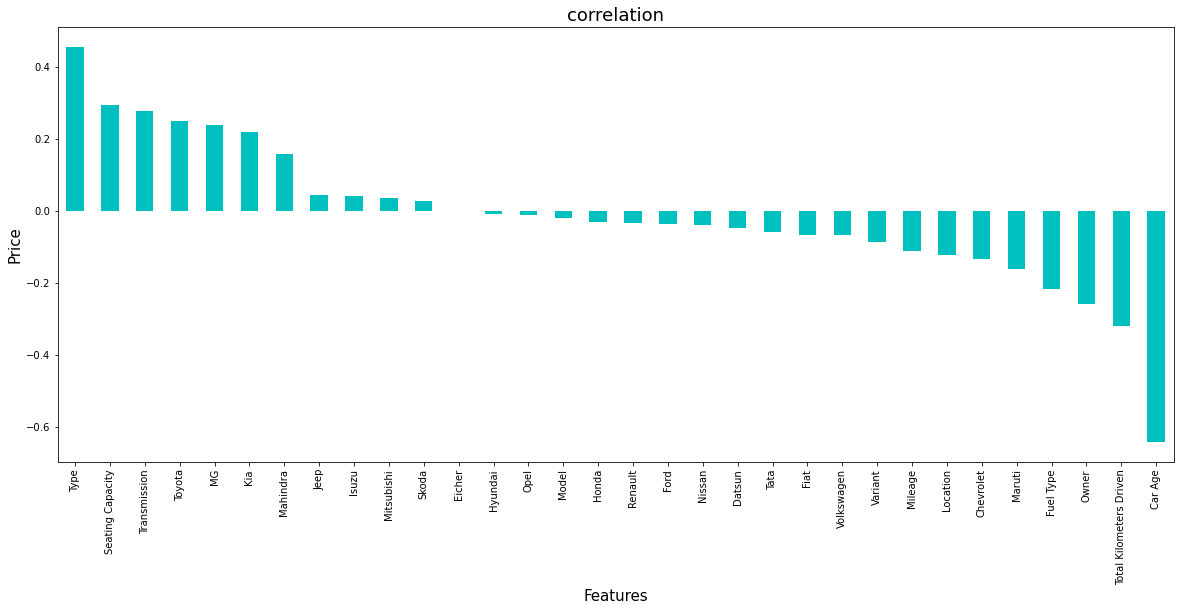

In [146]:
plt.figure(figsize = (20,8))
DF.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Type, Seating Capacity have the strongest positive correlation with Price while Car Age,Total Kilometers Driven,Owner and Fuel Type have the strongest negative correlation with Price.

### Feature Selection

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
X = DF.drop(columns = ['Price'])
y = DF['Price']

In [149]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif = pd.DataFrame()

In [152]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [153]:
vif

,Features,vif
0,Type,1.820311
1,Total Kilometers Driven,1.589312
2,Fuel Type,1.610300
3,Owner,1.224261
4,Location,1.018970
5,Transmission,1.091238
6,Seating Capacity,1.378541
7,Mileage,1.785701
8,Model,2.356090
9,Variant,1.291241


There is no Multicollinearity among the columns

### Selecting Kbest Features

In [154]:
from sklearn.feature_selection import SelectKBest, f_classif

In [155]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [156]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

                    Feature     Score
21                       MG  7.810969
20                      Kia  6.621769
10                  Car Age  6.409601
6          Seating Capacity  2.360881
0                      Type  2.233844
1   Total Kilometers Driven  2.005306
30                   Toyota  1.805455
22                 Mahindra  1.636365
5              Transmission  1.631383
2                 Fuel Type  1.622886
12                   Datsun  1.333130
4                  Location  1.330697
29                     Tata  1.282645
3                     Owner  1.260928
24               Mitsubishi  1.198383
7                   Mileage  1.172318
23                   Maruti  1.142386
9                   Variant  1.086801
17                  Hyundai  1.048762
28                    Skoda  1.043426
8                     Model  1.032035
16                    Honda  0.962018
31               Volkswagen  0.926324
11                Chevrolet  0.908046
27                  Renault  0.814470
15          

#### Selecting best features based on their scores:

In [157]:
x_best = X.drop(columns=['Opel','Eicher','Jeep']).copy()

In [158]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.


## Regression Model Building

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [161]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9122189321478518 on random_state: 90


In [162]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =90)

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [168]:
from sklearn.metrics import r2_score,mean_squared_error

In [169]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()
KNN = KNeighborsRegressor()

### Training the Models

In [171]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

All models have been trained.

### Ridge Regression Model

In [172]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [173]:
r2_score(y_test,y_r_pred)

0.701352602225954

#### Mean Squared Error 

In [174]:
mean_squared_error(y_test,y_r_pred)

40846272170.08002

#### Root Mean Squared Error

In [175]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

202104.6069986531

###  Random Forest Regression Model

In [176]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [177]:
r2_score(y_test,y_rf_pred)

0.9127960975308504

#### Mean Squared Error

In [178]:
mean_squared_error(y_test,y_rf_pred)

11926955872.031199

#### Root Mean Squared Error

In [179]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

109210.60329487792

### XGB Regression Model 

In [180]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [181]:
r2_score(y_test,y_xg_pred)

0.9230612747603638

#### Mean Squared Error

In [182]:
mean_squared_error(y_test,y_xg_pred)

10522978385.148666

#### Root Mean Squared Error

In [183]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

102581.56942233174

### Support Vector Regression Model

In [184]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [185]:
r2_score(y_test,y_svr_pred)

-0.04222633544836141

#### Mean Squared Error

In [186]:
mean_squared_error(y_test,y_svr_pred)

142546229693.78006

#### Root Mean Squared Error

In [187]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

377552.9495233484

###  Decision Tree Regression Model

In [188]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [189]:
r2_score(y_test,y_dt_pred)

0.8272046142150233

#### Mean Squared Error

In [190]:
mean_squared_error(y_test,y_dt_pred)

23633379731.797256

#### Root Mean Squared Error

In [191]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

153731.518342197

###  KNN Regression Model

In [192]:
y_knn_pred = KNN.predict(x_test)

####  R2 Score

In [193]:
r2_score(y_test,y_knn_pred)

0.804895424248558

#### Mean Squared Error

In [194]:
mean_squared_error(y_test,y_knn_pred)

26684627631.682533

#### Root Mean Squared Error

In [195]:
np.sqrt(mean_squared_error(y_test,y_knn_pred))

163354.3009280213

### Model Cross Validation

In [196]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [197]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.6884482081366692

#### Random Forest Regression

In [198]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.8929516971118987

#### XGB Regression

In [199]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.9092138998450912

#### SV Regression

In [200]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.05723565341101864

#### Decision Tree Regression

In [201]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.8138140565240544

#### KNN Regression

In [202]:
cross_val_score(KNN,scaled_x_best,y,cv=5).mean()

0.8024696110352441

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [203]:
from sklearn.model_selection import GridSearchCV

#### XGB Regressor

In [204]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [205]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [206]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [207]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'subsample': 0.5}

In [208]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 3,subsample = 0.5)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [209]:
xgbpred = Best_mod.predict(x_test)

acc = r2_score(y_test,xgbpred)
print(acc*100)

92.4828003021342


### XGB Regressor has an accuracy of 92.48%

#### Saving The Model

In [211]:
import joblib
joblib.dump(Best_mod,"BestModelCar.pkl")

['BestModelCar.pkl']

#### Loading The Model

In [212]:
mod=joblib.load("BestModelCar.pkl")

In [213]:
print(mod.predict(scaled_x_best))

[ 179889.44  363192.97  488527.47 ... 1333313.5   209056.33 1699480.  ]


In [215]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y[0:7207]})
Prediction_accuracy

,Predictions,Actual Values
0,1.798894e+05,180000.0
1,3.631930e+05,350000.0
2,4.885275e+05,480000.0
3,6.933516e+05,654050.0
4,9.021162e+05,850000.0
...,...,...
7202,6.616298e+05,850000.0
7203,7.306963e+05,715000.0
7204,1.333314e+06,1299997.0
7205,2.090563e+05,210000.0
